# 0. 라이브러리 불러오기

In [1]:
# 1. 데이터 처리와 분석
import pandas as pd
import numpy as np
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 2. 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 및 마이너스 부호 설정 
plt.rcParams['font.family'] = 'gulim'
plt.rcParams['axes.unicode_minus'] = False
sns.set(font='gulim', style='whitegrid', rc={'axes.unicode_minus': False})

# 3. 데이터 전처리 및 머신러닝
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.impute import KNNImputer

plt.rcParams['font.family'] = 'gulim'
plt.rcParams['axes.unicode_minus'] = False
sns.set(font='gulim', rc={'axes.unicode_minus': False})

# 1. 데이터 불러오기

In [2]:
df = pd.read_csv('./data1/Dubizzle_used_car_sales.csv')
df.head(5)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


# 2. EDA 분석

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   int64  
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

In [4]:
df.describe() 

,price_in_aed,kilometers,year
count,9.970000e+03,9.970000e+03,9000.000000
mean,2.480496e+05,9.894896e+04,2015.626444
std,4.536549e+05,1.154300e+06,4.735991
min,6.000000e+03,0.000000e+00,1953.000000
25%,5.100000e+04,2.314350e+04,2014.000000
50%,1.040000e+05,7.600000e+04,2016.000000
75%,2.340000e+05,1.330828e+05,2019.000000
max,1.499900e+07,1.150000e+08,2021.000000


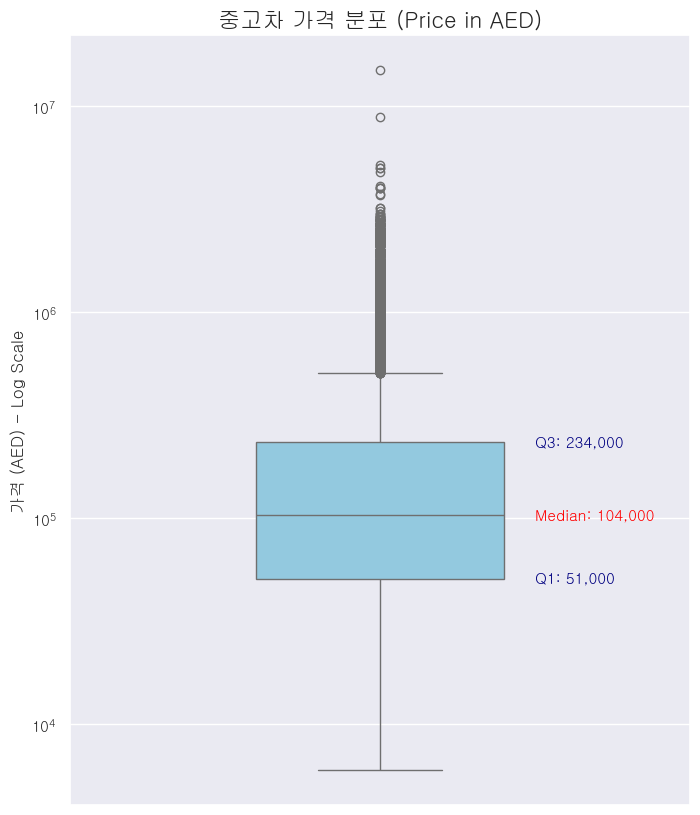

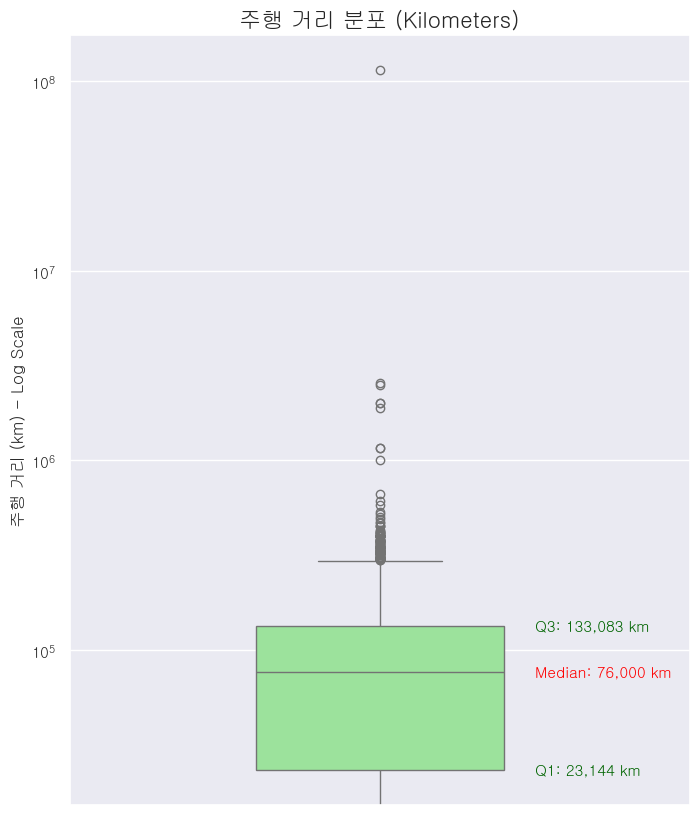

In [5]:
# --- 1. price_in_aed 박스플롯 ---
plt.figure(figsize=(8, 10))

ax1 = sns.boxplot(y=df['price_in_aed'], color='skyblue', width=0.4)

price_median = df['price_in_aed'].median()
price_q1 = df['price_in_aed'].quantile(0.25)
price_q3 = df['price_in_aed'].quantile(0.75)

plt.text(0.25, price_q3, f'Q3: {price_q3:,.0f}', va='center', ha='left', fontsize=11, color='navy')
plt.text(0.25, price_median, f'Median: {price_median:,.0f}', va='center', ha='left', fontsize=11, fontweight='bold', color='red')
plt.text(0.25, price_q1, f'Q1: {price_q1:,.0f}', va='center', ha='left', fontsize=11, color='navy')

plt.title('중고차 가격 분포 (Price in AED)', fontsize=16, fontweight='bold')
plt.ylabel('가격 (AED) - Log Scale', fontsize=12)
plt.yscale('log')
plt.xticks([]) 
plt.show()


# --- 2. kilometers 박스플롯  ---
plt.figure(figsize=(8, 10))

ax2 = sns.boxplot(y=df['kilometers'], color='lightgreen', width=0.4)

km_median = df['kilometers'].median()
km_q1 = df['kilometers'].quantile(0.25)
km_q3 = df['kilometers'].quantile(0.75)

plt.text(0.25, km_q3, f'Q3: {km_q3:,.0f} km', va='center', ha='left', fontsize=11, color='darkgreen')
plt.text(0.25, km_median, f'Median: {km_median:,.0f} km', va='center', ha='left', fontsize=11, fontweight='bold', color='red')
plt.text(0.25, km_q1, f'Q1: {km_q1:,.0f} km', va='center', ha='left', fontsize=11, color='darkgreen')

plt.title('주행 거리 분포 (Kilometers)', fontsize=16, fontweight='bold')
plt.ylabel('주행 거리 (km) - Log Scale', fontsize=12)
plt.yscale('log')
plt.xticks([])
plt.show()

describe()함수를 통한 초기 통계량 분석결과 <br>
price_in_aed, kilometers에 이상치가 극단적인 값이 관측되어 이상치 존재 가능성이 재기,<br>
boxplot으로 이상치를 시각적으로 확인한 결과, price_in_aed는 실제 최고급 매물이나 고급 스포츠 카가 있을 경우가 있다고 판단,<br>
kilometers는 극단적 이상치가 있다고 판단,<br>
전처리 과정 중 price in aed는 로그 변환 적용을 통해 전처리, kilometers는 극단적 이상치 제거, 합리적 상한값으로 대체 예정<br>

C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\3404022318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df, y='body_type',


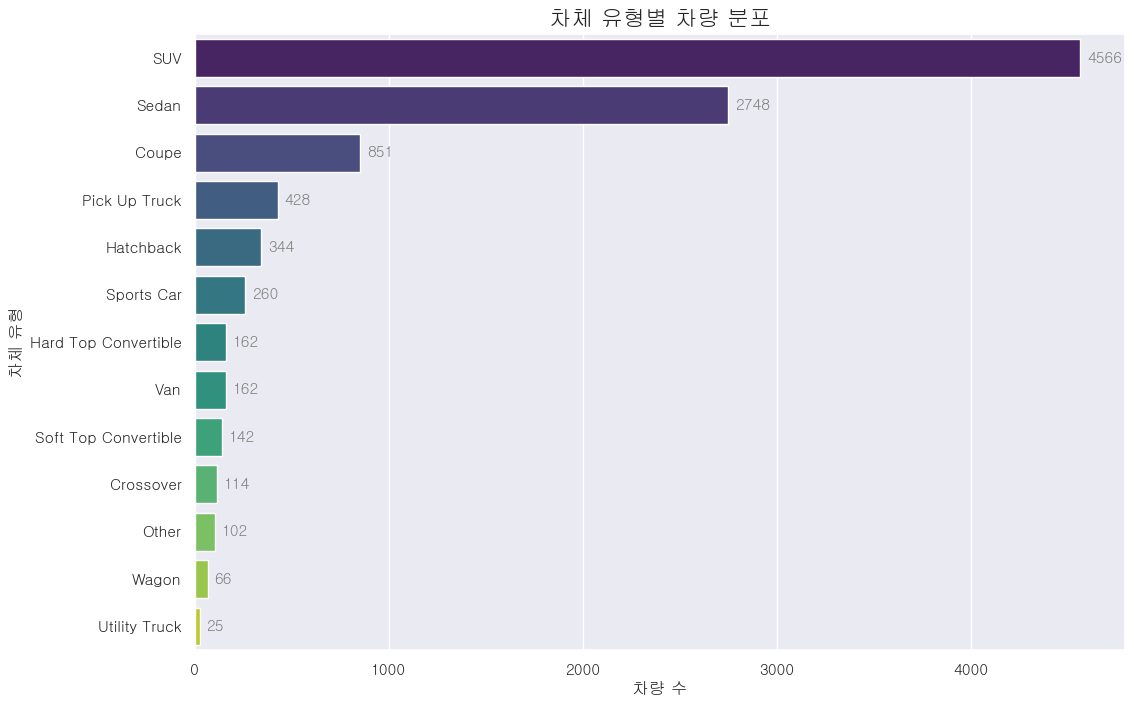

C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\3404022318.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=df, y='company',


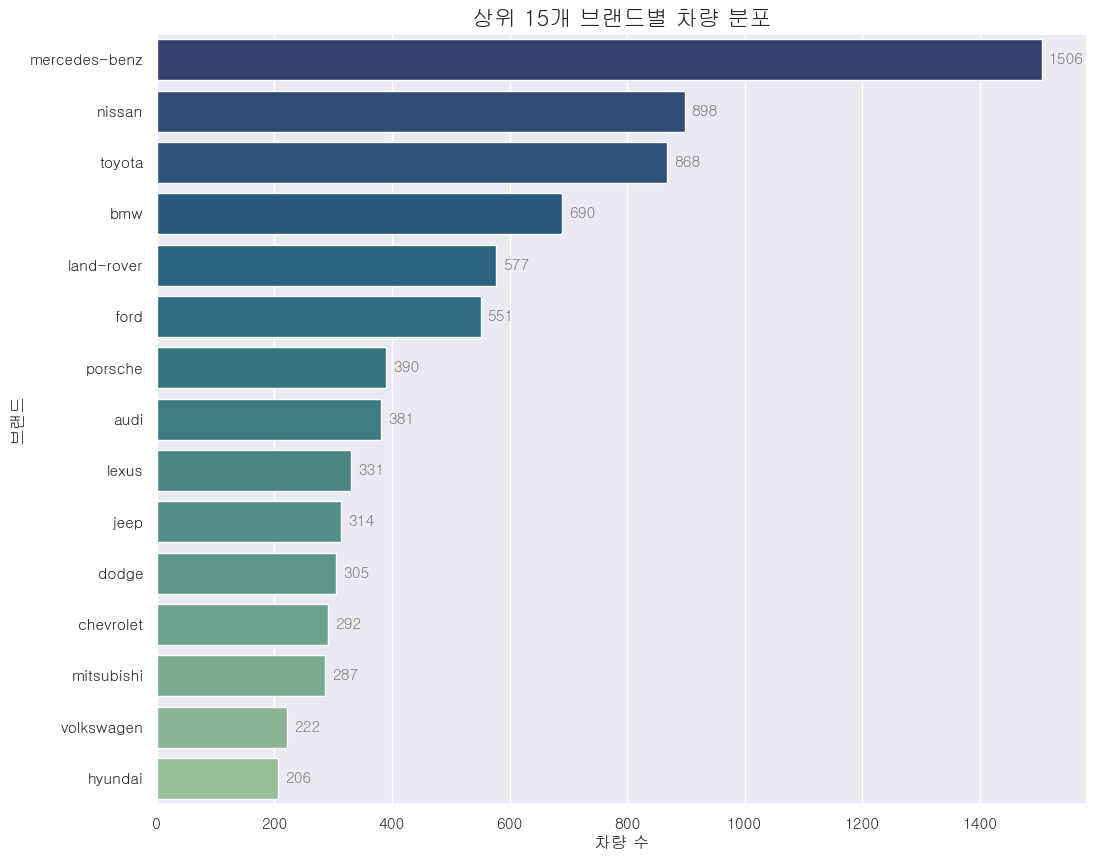

In [6]:
# --- 1. 'body_type' 컬럼의 차체 유형별 차량 수 ---
plt.figure(figsize=(12, 8))

ax1 = sns.countplot(data=df, y='body_type', 
                    order=df['body_type'].value_counts().index,
                    palette='viridis')

plt.title('차체 유형별 차량 분포', fontsize=16, fontweight='bold')
plt.xlabel('차량 수', fontsize=12)
plt.ylabel('차체 유형', fontsize=12)

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_width())}', 
                   (p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha='left', va='center', fontsize=11, color='gray', xytext=(5, 0),
                   textcoords='offset points')
plt.show()


# --- 2. 'company' (브랜드) 컬럼의 차량 수 ---
plt.figure(figsize=(12, 10))

# 상위 15개 브랜드만 선택
top_15_companies = df['company'].value_counts().index[:15]

ax2 = sns.countplot(data=df, y='company', 
                    order=top_15_companies,
                    palette='crest_r') 

plt.title('상위 15개 브랜드별 차량 분포', fontsize=16, fontweight='bold')
plt.xlabel('차량 수', fontsize=12)
plt.ylabel('브랜드', fontsize=12)

for p in ax2.patches:
    ax2.annotate(f'{int(p.get_width())}', 
                   (p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha='left', va='center', fontsize=11, color='gray', xytext=(5, 0),
                   textcoords='offset points')
plt.show()

body_type컬럼의 분포 분석결과 SUV, SEDAN, COUPE 3가지 차체 유형이 전체 데이터에서  압도적인 비중을 차지하며 유의미한 분포를 보임,<br>
따라서 3가지의 유형만을 개별 범주로 유지하고 나머지 희귀 유형을 other로 묶는 원-핫-인코딩 예정<br>
company컬럼의 분포 분석결과 벤츠가 가장 높은 비율을 보였지만 그 외 다수의 브랜드들 역시 중요한 시장 점유율과 유의미한 차량수를 보유하고 있어,<br>
각 브랜드별 과도한 차원 증가 방지, 브랜드별 가격 유지를 위해 타겟 인코딩을 적용하여 전처리 예정<br>

C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\450116564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_in_aed', y='body_type',


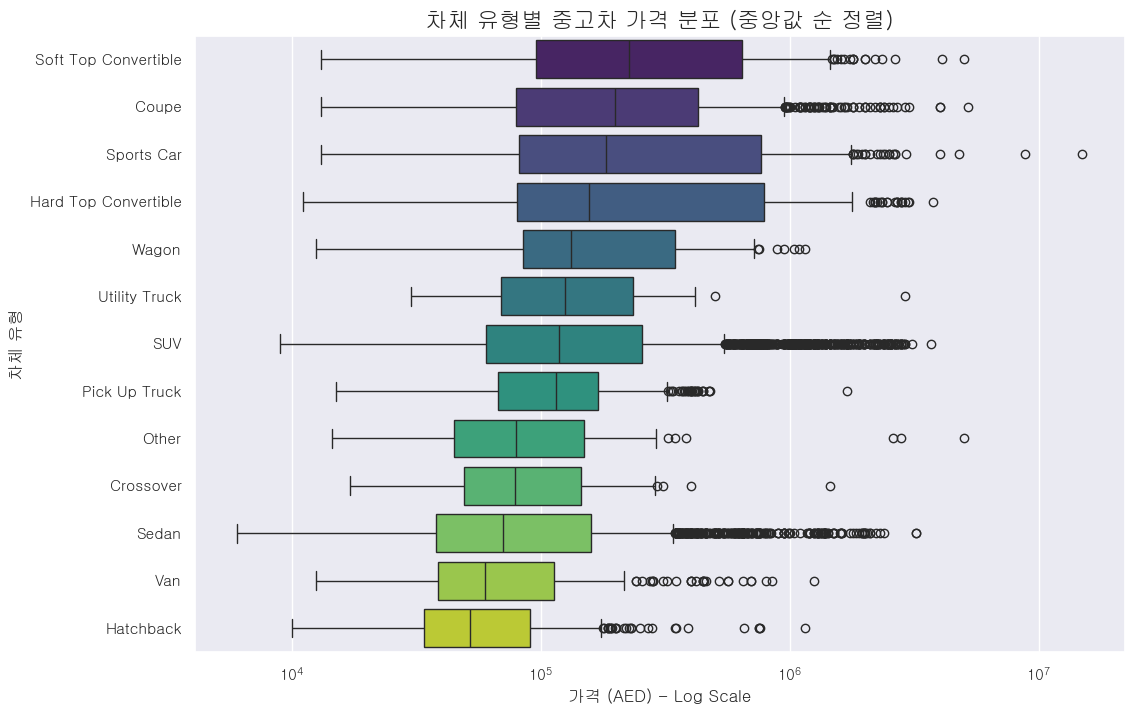

C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\450116564.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_in_aed', y='seller_type',


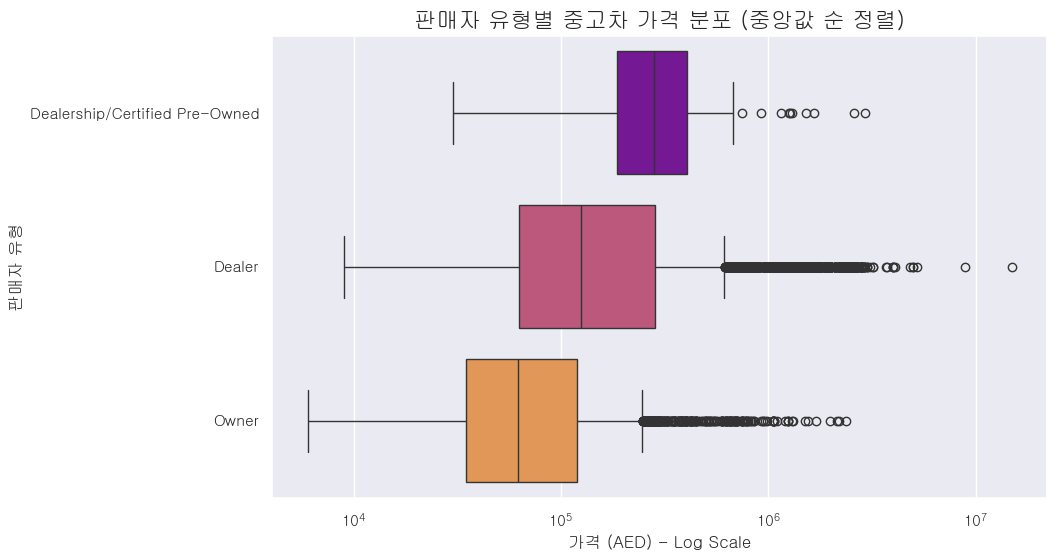

C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\450116564.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='price_in_aed', y='company',


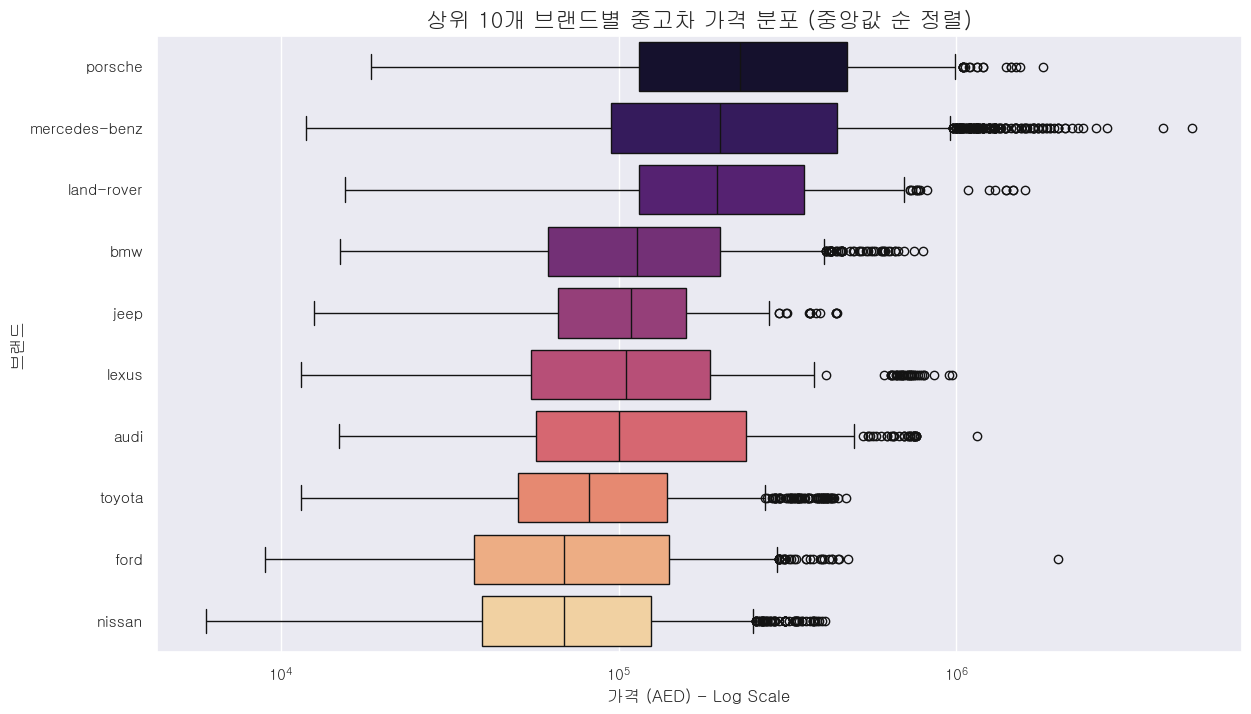

In [7]:
# --- 1. 'body_type'에 따른 가격 분포  ---
plt.figure(figsize=(12, 8))

body_type_order = df.groupby('body_type')['price_in_aed'].median().sort_values(ascending=False).index

sns.boxplot(data=df, x='price_in_aed', y='body_type', 
            order=body_type_order, 
            palette='viridis')

plt.title('차체 유형별 중고차 가격 분포 (중앙값 순 정렬)', fontsize=16, fontweight='bold')
plt.xlabel('가격 (AED) - Log Scale', fontsize=12)
plt.ylabel('차체 유형', fontsize=12)
plt.xscale('log') # 가로 그래프이므로 x축에 로그 스케일 적용
plt.show()

# --- 2. 'seller_type'에 따른 가격 분포 ---
plt.figure(figsize=(10, 6))

seller_type_order = df.groupby('seller_type')['price_in_aed'].median().sort_values(ascending=False).index

sns.boxplot(data=df, x='price_in_aed', y='seller_type', 
            order=seller_type_order, 
            palette='plasma')

plt.title('판매자 유형별 중고차 가격 분포 (중앙값 순 정렬)', fontsize=16, fontweight='bold')
plt.xlabel('가격 (AED) - Log Scale', fontsize=12)
plt.ylabel('판매자 유형', fontsize=12)
plt.xscale('log')
plt.show()


# --- 3. 상위 10개 'company'에 따른 가격 분포  ---
top_10_companies = df['company'].value_counts().head(10).index
df_top10 = df[df['company'].isin(top_10_companies)]

plt.figure(figsize=(14, 8))

company_order = df_top10.groupby('company')['price_in_aed'].median().sort_values(ascending=False).index

sns.boxplot(data=df_top10, x='price_in_aed', y='company',
            order=company_order,
            palette='magma')

plt.title('상위 10개 브랜드별 중고차 가격 분포 (중앙값 순 정렬)', fontsize=16, fontweight='bold')
plt.xlabel('가격 (AED) - Log Scale', fontsize=12)
plt.ylabel('브랜드', fontsize=12)
plt.xscale('log')
plt.show()

모든 가격 관련 박스플롯에서 시각화 데이터가 오른쪽으로 심하게 치우쳐진 분포를 보여 로그변환이 필요했던 점을 고려해,<br>
 price_in_aed의 로그변환이 전처리 과정이 합리적이라고 판단<br>
body_type의 SUV, Sedan, Coupe가 일관되게 높은 가격 분포를 확인. 중고차 시장에서 가치를 인정받고 있다고 판단,<br>
동시에 스포츠카에 가격 평균과 가격들이 전부 고평가 받고 있는 것을 확인,<br>
price_in_aed는 실제 최고급 매물이나 고급 스포츠 카가 있을 경우가 있다고 판단"가설을 시각적으로 확인,<br>
3 가지 차 유형을 그룹화하는 전략이 타당함을 재확인<br>
company의 벤츠와 아우디와 같은 특정 브랜드의 높은 가격을 형성하고 있음을 확인,<br>
company에 타겟 인코딩을 적용하려는 계획의 타당성을 재확보<br>
Seller_type의 경우 판매자 유형별로 가격차이가 뚜렷하기에 원-핫인코딩 적응 예정  

In [8]:
df['horsepower'].value_counts()

horsepower
200 - 300 HP        2432
300 - 400 HP        2208
400 - 500 HP        1279
150 - 200 HP        1222
500 - 600 HP        1027
Unknown              814
Less than 150 HP     394
600 - 700 HP         391
700 - 800 HP         153
800 - 900 HP          30
900+ HP               20
Name: count, dtype: int64

In [9]:
df['no_of_cylinders'].value_counts()

no_of_cylinders
6          3325
4          2993
8          2986
12          366
Unknown      57
3            56
10           53
5            53
Name: count, dtype: int64

도메인 지식으로 실린더(no_of_cylinders)와 마력(horsepower)가 강한 상관관계가 있다고 가설을 세움,<br>
하지만 마력과 실린더의 값에 unknown값을 전처리를 해줘야하다고 판단,<br>
추가로 마력의 문자형데이터를 숫자형데이터로 전처리를 해줘야한다고 판단,<br>
전처리를 완료한 후 가설을 입증하기 위해 산점도와 박스플롯을 사용

In [10]:
# --- 1. 'horsepower' 컬럼: 텍스트 범위를 숫자형(NaN 포함)으로 변환하는 함수  ---
def parse_horsepower_to_numeric_corrected(hp_str):
    """'horsepower' 열의 다양한 텍스트 형식을 숫자 또는 NaN으로 변환합니다."""
    if pd.isna(hp_str) or str(hp_str).strip().lower() == 'unknown' or not isinstance(hp_str, str):
        return np.nan

    hp_str = hp_str.replace(' HP', '').strip()

    if 'Less than' in hp_str:
        try:
            value = int(re.findall(r'\d+', hp_str)[0])
            return value / 2
        except (ValueError, IndexError):
            return np.nan
    elif '+' in hp_str:
        try:
            value = int(re.findall(r'\d+', hp_str)[0])
            return value + 50
        except (ValueError, IndexError):
            return np.nan
    else:
        match = re.match(r'(\d+)\s*-\s*(\d+)', hp_str)
        if match:
            lower, upper = int(match.group(1)), int(match.group(2))
            return (lower + upper) / 2
        else:
            try:
                return float(hp_str)
            except ValueError:
                return np.nan

print("--- 'horsepower' 전처리 시작 (수정된 코드) ---")
df['horsepower_numeric'] = df['horsepower'].apply(parse_horsepower_to_numeric_corrected)
print(f"-> 'horsepower_numeric' 생성 완료. 결측치 개수: {df['horsepower_numeric'].isnull().sum()}")


# --- 2. 'no_of_cylinders' 컬럼: 숫자형(NaN 포함)으로 변환 ---
print("\n--- 'no_of_cylinders' 전처리 시작 ---")
df['no_of_cylinders_numeric'] = pd.to_numeric(df['no_of_cylinders'], errors='coerce')
print(f"-> 'no_of_cylinders_numeric' 생성 완료. 결측치 개수: {df['no_of_cylinders_numeric'].isnull().sum()}")

# --- 3. 전처리된 데이터 확인 ---
print("\n--- 전처리된 데이터 확인 (상위 5개) ---")
print(df[['horsepower', 'horsepower_numeric', 'no_of_cylinders', 'no_of_cylinders_numeric']].head())

--- 'horsepower' 전처리 시작 (수정된 코드) ---
-> 'horsepower_numeric' 생성 완료. 결측치 개수: 814

--- 'no_of_cylinders' 전처리 시작 ---
-> 'no_of_cylinders_numeric' 생성 완료. 결측치 개수: 138

--- 전처리된 데이터 확인 (상위 5개) ---
         horsepower  horsepower_numeric no_of_cylinders  \
0           Unknown                 NaN               6   
1      400 - 500 HP               450.0               8   
2      400 - 500 HP               450.0               6   
3      600 - 700 HP               650.0               8   
4  Less than 150 HP                75.0               4   

   no_of_cylinders_numeric  
0                      6.0  
1                      8.0  
2                      6.0  
3                      8.0  
4                      4.0  


C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\4033325557.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


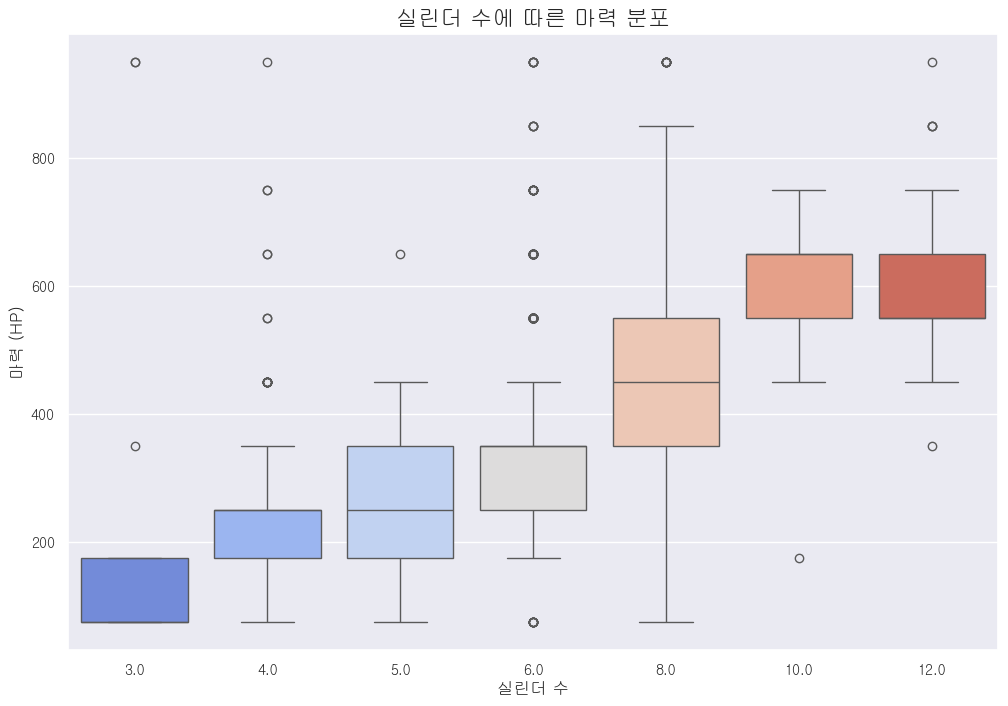

C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\4033325557.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_hp_price['horsepower_bins'] = pd.cut(
C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\4033325557.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


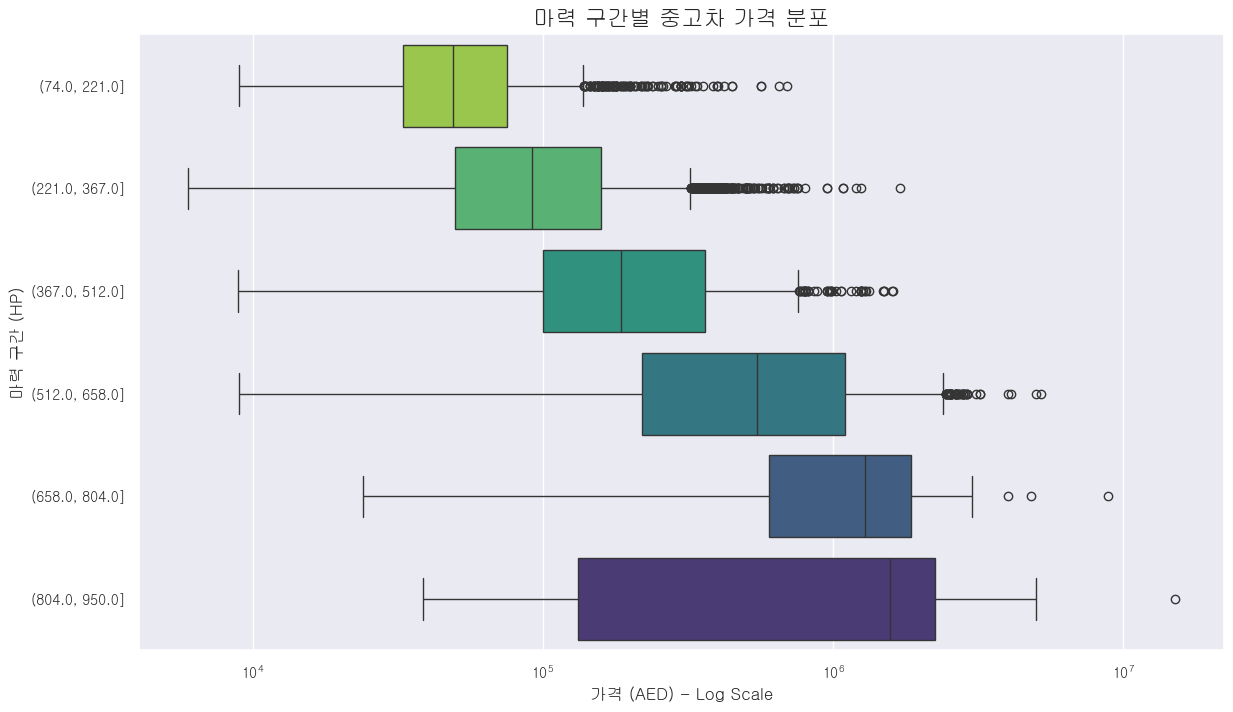

In [11]:
# --- 1. 실린더 수(no_of_cylinders_numeric)에 따른 마력(horsepower_numeric) 분포 박스플롯 ---
plt.figure(figsize=(12, 8))

# NaN 값을 제외하고 그리기 위해 dropna()를 사용
df_cleaned_cyl_hp = df.dropna(subset=['no_of_cylinders_numeric', 'horsepower_numeric'])

sns.boxplot(
    data=df_cleaned_cyl_hp,
    x='no_of_cylinders_numeric',
    y='horsepower_numeric',
    palette='coolwarm'
)

plt.title('실린더 수에 따른 마력 분포', fontsize=16, fontweight='bold')
plt.xlabel('실린더 수', fontsize=12)
plt.ylabel('마력 (HP)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('cylinders_vs_horsepower.png')
plt.show()


# --- 2. 마력(horsepower_numeric) 구간에 따른 가격(price_in_aed) 분포 박스플롯 ---
plt.figure(figsize=(14, 8))

# 마력과 가격에 NaN이 없는 데이터만 사용합니다.
df_cleaned_hp_price = df.dropna(subset=['horsepower_numeric', 'price_in_aed'])

# 마력(horsepower_numeric)을 6개의 구간으로 나눕니다.
df_cleaned_hp_price['horsepower_bins'] = pd.cut(
    df_cleaned_hp_price['horsepower_numeric'],
    bins=6, 
    precision=0 # 소수점 정리
)

sns.boxplot(
    data=df_cleaned_hp_price,
    x='price_in_aed',
    y='horsepower_bins',
    palette='viridis_r', 
    order=sorted(df_cleaned_hp_price['horsepower_bins'].unique(), key=lambda x: x.left) # 구간 순서 정렬
)

# 가격 분포가 넓으므로 x축을 로그 스케일로 변환
plt.xscale('log')

plt.title('마력 구간별 중고차 가격 분포', fontsize=16, fontweight='bold')
plt.xlabel('가격 (AED) - Log Scale', fontsize=12)
plt.ylabel('마력 구간 (HP)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('horsepower_vs_price.png')
plt.show()

EDA 결과 실린더 수와 마력은 뚜렷한 양의 상관관계를 보이며, 이는 실린더 수와 마력이 강한 상관관계가 있다는 가설을 뒷받침할만한 자료라고 판단,<Br>
더 나아가 마력이 증가함에 따라 중고차 가격이 증가하는 강한 상관관계를 보이는 것을 확인,<br>
이는 마력이 중고차 가격을 예측하는 핵심 예측 변수중 하나로 판단됩니다

마력의 크기와 실린더의 갯수가 상관관계를 가지고 있다는 것을 박스플롯을 통해 확인,<br>
가설을 입증하기 위해 추가로 상관관계 분석을 실시함

--- 수치형 변수 간 상관계수 행렬 ---
                         price_in_aed  kilometers      year  \
price_in_aed                 1.000000   -0.028398  0.242598   
kilometers                  -0.028398    1.000000 -0.052351   
year                         0.242598   -0.052351  1.000000   
horsepower_numeric           0.565401   -0.008138  0.065492   
no_of_cylinders_numeric      0.476277    0.002385 -0.099151   

                         horsepower_numeric  no_of_cylinders_numeric  
price_in_aed                       0.565401                 0.476277  
kilometers                        -0.008138                 0.002385  
year                               0.065492                -0.099151  
horsepower_numeric                 1.000000                 0.750373  
no_of_cylinders_numeric            0.750373                 1.000000  

--- 상관관계 히트맵 시각화 ---


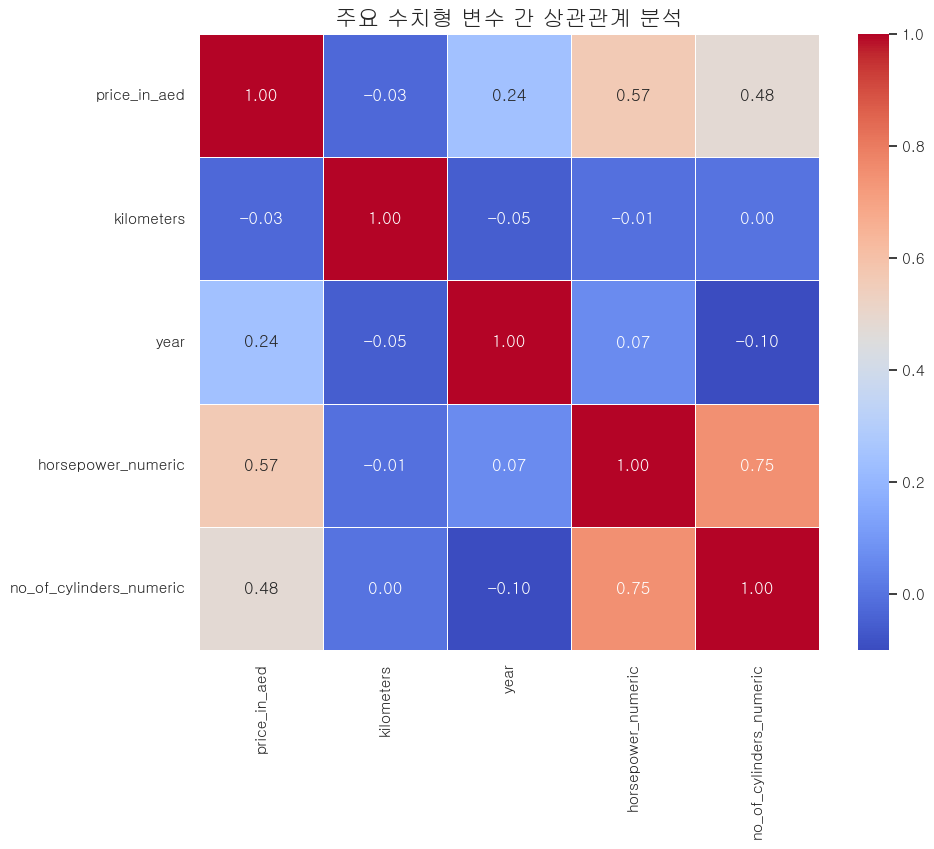

In [12]:
# --- 1. 분석에 사용할 숫자형 변수 선택 ---
numerical_cols = [
    'price_in_aed',
    'kilometers',
    'year',
    'horsepower_numeric',
    'no_of_cylinders_numeric'
]

# 선택된 열들로 새로운 데이터프레임 생성
df_corr = df[numerical_cols]

# --- 2. 상관계수 행렬 계산 ---
correlation_matrix = df_corr.corr()

print("--- 수치형 변수 간 상관계수 행렬 ---")
print(correlation_matrix)


# --- 3. 히트맵(Heatmap)으로 시각화 ---
print("\n--- 상관관계 히트맵 시각화 ---")
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,      
    cmap='coolwarm', 
    fmt='.2f',       
    linewidths=.5    
)
plt.title('주요 수치형 변수 간 상관관계 분석', fontsize=16, fontweight='bold')
plt.savefig('correlation_heatmap.png')
plt.show()


In [13]:
# --- 1. VIF 분석을 위한 독립 변수 선택 ---
vif_columns = [
    'kilometers', 
    'year', 
    'horsepower_numeric', 
    'no_of_cylinders_numeric'
]

print("--- VIF 분석 (결측치 임시 제거 후 진행) ---")

# --- 2. 분석용 임시 데이터프레임 생성 및 결측치 제거 ---
df_vif = df[vif_columns].dropna()

# --- 3. 상수항 추가 ---
df_vif_const = add_constant(df_vif)


# --- 4. VIF 계수 계산 ---
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif_const.values, i) for i in range(df_vif_const.shape[1])]


# --- 5. 결과 출력 ---
print("\n[VIF 계수 분석 결과]")
print(vif_data)


--- VIF 분석 (결측치 임시 제거 후 진행) ---

[VIF 계수 분석 결과]
                   feature            VIF
0                    const  201802.458333
1               kilometers       1.002719
2                     year       1.060989
3       horsepower_numeric       2.363541
4  no_of_cylinders_numeric       2.377292


horsepower와 no_of_cylinders 컬럼들의 상관계수가 0.75로 높게 나와 다중공선성 문제가 우려되어 VIF값을 구했지만,<br>
horsepower의 VIF값이 2.36, no_of_cylinders의 VIF값이 2.37으로 일반적으로 허용 가능한 수준의 VIF값으로, <br>
두 변수 모델간의 심각한 다중공선성 문제가 야기하지 않음을 판단 되었습니다.

따라서 horsepower와 no_of_cylinders의 강한 연관성을 고려해 두 변수의 결측치를 단순한 단일 값으로 대체하는 것이 아닌,<br>
두 변수간의 상호 정보를 확인하여 더 정확한 K-최근접이웃(KNN) 대체 기법을 활용하여 결측치를 채울 예정입니다.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\142008166.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index, palette='plasma')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\142008166.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index, palette='plasma')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\142008166.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, order=df[col].value_count

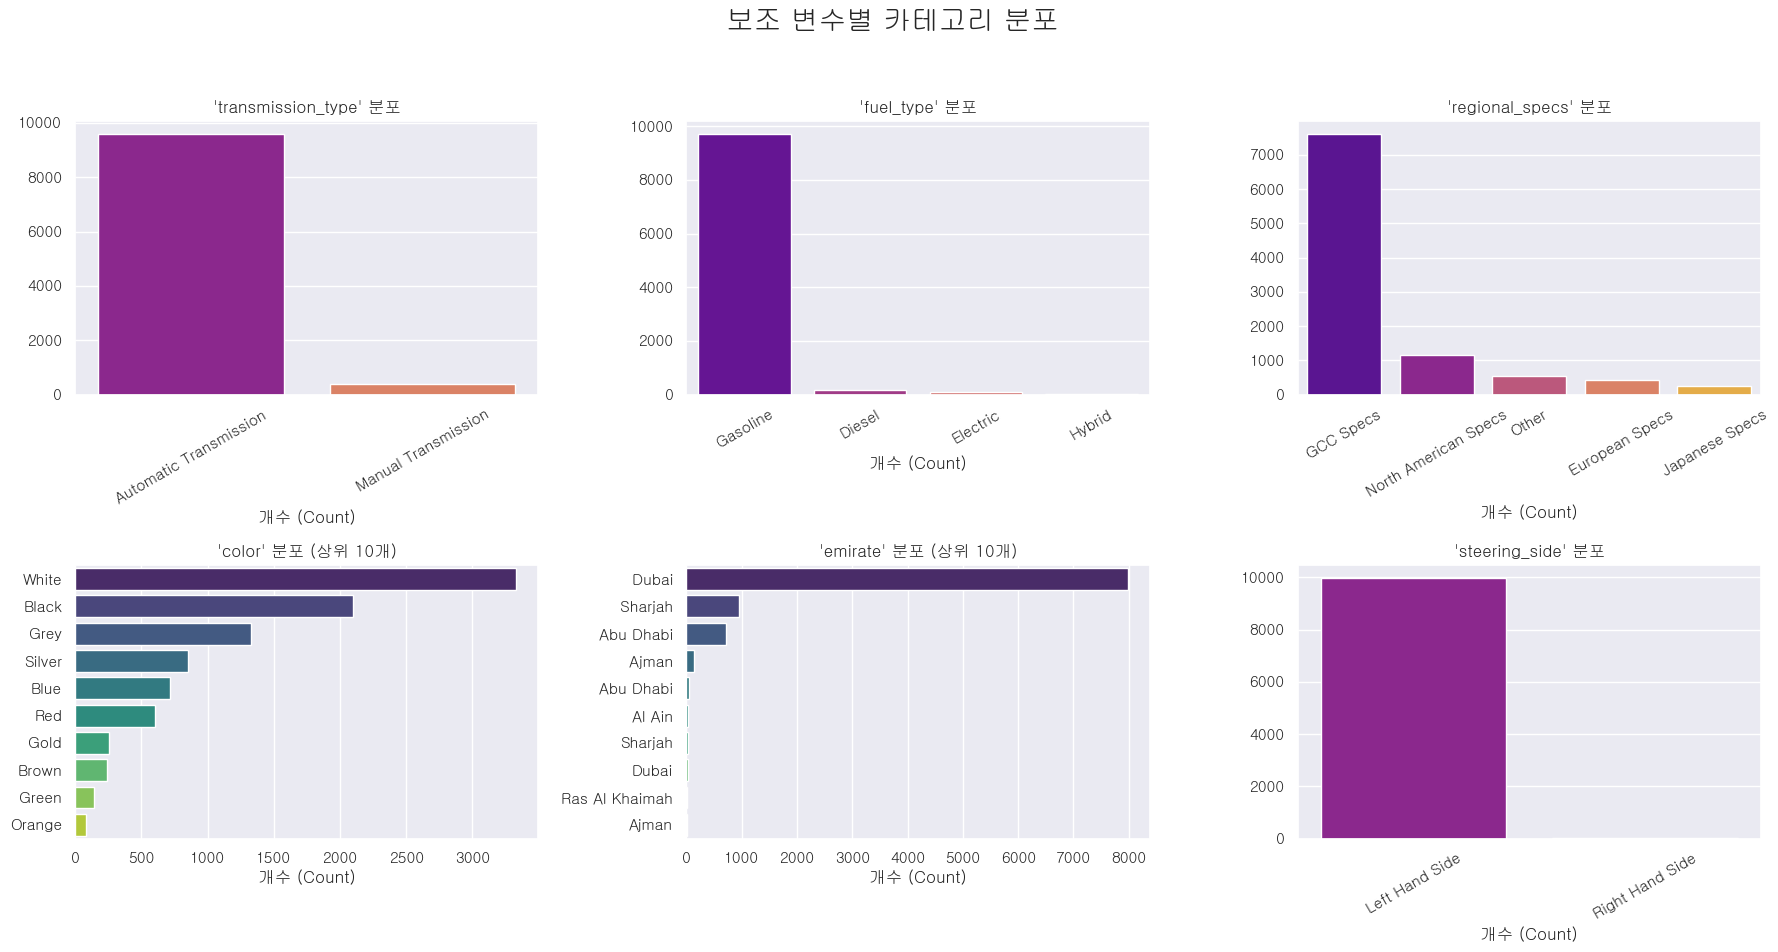

In [14]:
# 분석할 보조 변수들의 리스트
categorical_cols = [
    'transmission_type', 
    'fuel_type', 
    'regional_specs', 
    'color', 
    'emirate',
    'steering_side'
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('보조 변수별 카테고리 분포', fontsize=20, fontweight='bold')

for i, col in enumerate(categorical_cols):
    ax = axes[i//3, i%3]
    
    # 카테고리가 많은 'color'와 'emirate'는 상위 10개만 표시
    if df[col].nunique() > 10:
        order = df[col].value_counts().nlargest(10).index
        sns.countplot(data=df, y=col, ax=ax, order=order, palette='viridis')
        ax.set_title(f"'{col}' 분포 (상위 10개)")
    else:
        sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index, palette='plasma')
        ax.set_title(f"'{col}' 분포")
        ax.tick_params(axis='x', rotation=30) 
    
    ax.set_xlabel('개수 (Count)')
    ax.set_ylabel('')

if len(categorical_cols) < 6:
    axes[1, 2].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('distributions_grid.png')
plt.show()

EDA 결과를 바탕으로, 범주형 변수는 분포 특성을 고려하여 원-핫 인코딩을 진행.<br>
color, emirate는 상위 3개의 분포가 넓어 상위 3개 범주 외에는 'Other'로 통합.<br>
transmission_type, fuel_type, regional_specs 처럼 틀정 카테고리에 데이터가 집중된 변수는 <br>
최빈값과 그 외 'Other'로 이진화하여처리 예정<br>
steering_sied는 변수 내에 변화나 다양성이 없고, 핸들의 위치로 중고차 가격을 예측하는 유의미한 패턴을 학습시키기 불가능할 것으로 판단<br>
따라서 steering_side컬럼은 제거 예정

--- 생성된 피처 확인 (상위 5개) ---
  date_posted  days_on_market  post_month
0  2022-05-13               0           5
1  2022-01-14             119           1
2  2022-05-05               8           5
3  2022-04-30              13           4
4  2022-05-13               0           5

--- '게시 경과일(days_on_market)' 기초 통계량 ---
count    9970.000000
mean       45.398395
std        67.817756
min         0.000000
25%         6.000000
50%        24.000000
75%        58.000000
max      1375.000000
Name: days_on_market, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\340632776.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='post_month', data=df, ax=axes[1], palette='viridis')


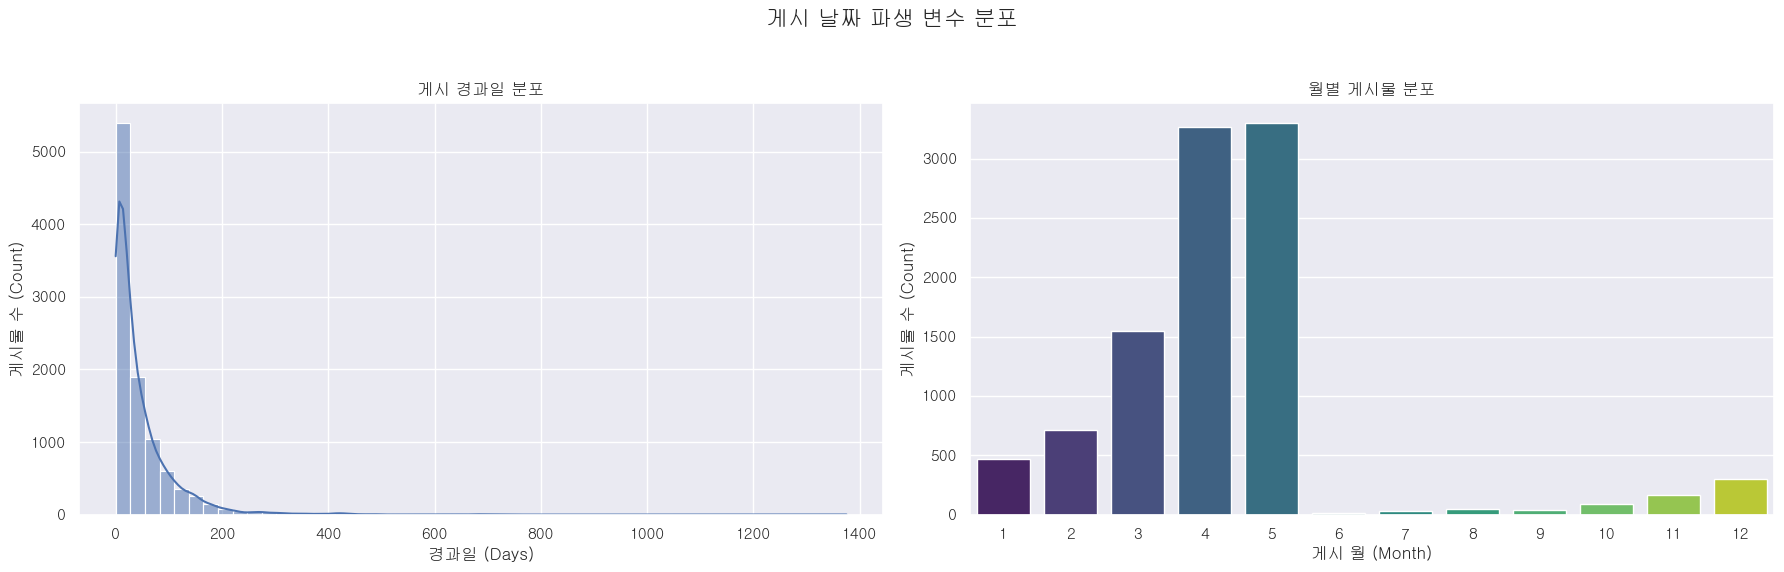

In [15]:
# --- 1. 'date_posted'를 datetime 형식으로 변환 ---
df['date_posted'] = pd.to_datetime(df['date_posted'], dayfirst=True)

# --- 2. 피처 엔지니어링: '게시 경과일' 및 '게시 월' 생성 ---
# 데이터셋의 가장 마지막 날짜를 분석 기준일로 설정
analysis_date = df['date_posted'].max()

# '게시 경과일' 계산
df['days_on_market'] = (analysis_date - df['date_posted']).dt.days

# '게시 월' 추출
df['post_month'] = df['date_posted'].dt.month

print("--- 생성된 피처 확인 (상위 5개) ---")
print(df[['date_posted', 'days_on_market', 'post_month']].head())

print("\n--- '게시 경과일(days_on_market)' 기초 통계량 ---")
print(df['days_on_market'].describe())


# --- 3. 생성된 피처 시각화 ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('게시 날짜 파생 변수 분포', fontsize=16, fontweight='bold')

# '게시 경과일' 분포
sns.histplot(df['days_on_market'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('게시 경과일 분포')
axes[0].set_xlabel('경과일 (Days)')
axes[0].set_ylabel('게시물 수 (Count)')

# '게시 월' 분포 
sns.countplot(x='post_month', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('월별 게시물 분포')
axes[1].set_xlabel('게시 월 (Month)')
axes[1].set_ylabel('게시물 수 (Count)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

EDA의 결과를 보면 대부분이 신규 매물인것으로 판단됨.<br>
한쪽으로 치우쳐진 데이터의 정규성을 위해 전처리 과정에서 days_on_market을 로그변환 처리 예정<br>
월별 게시물 분포를 보면 4월과 5월의 게시물이 크게 증가하는 것으로 보여 post_month를 4월과 5월로 원-핫 인코딩을 적용하여<br>
독립적인 모델을 학습할 수 있도록 할 계획

--- 'body_condition' 분포 ---
body_condition
Perfect inside and out                9612
No accidents, very few faults          208
A bit of wear & tear, all repaired     119
Normal wear & tear, a few issues        31
Name: count, dtype: int64


--- 'mechanical_condition' 분포 ---
mechanical_condition
Perfect inside and out              9822
Minor faults, all fixed              136
Major faults fixed, small remain       8
Ongoing minor & major faults           3
Major faults, all fixed                1
Name: count, dtype: int64


--- 'body_condition' vs 'mechanical_condition' 교차표 ---
mechanical_condition                Major faults fixed, small remain  \
body_condition                                                         
A bit of wear & tear, all repaired                                 2   
No accidents, very few faults                                      0   
Normal wear & tear, a few issues                                   4   
Perfect inside and out                                

C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\291109022.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_in_aed', y='body_condition', ax=axes[0], palette='pastel')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\291109022.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_in_aed', y='mechanical_condition', ax=axes[1], palette='pastel')


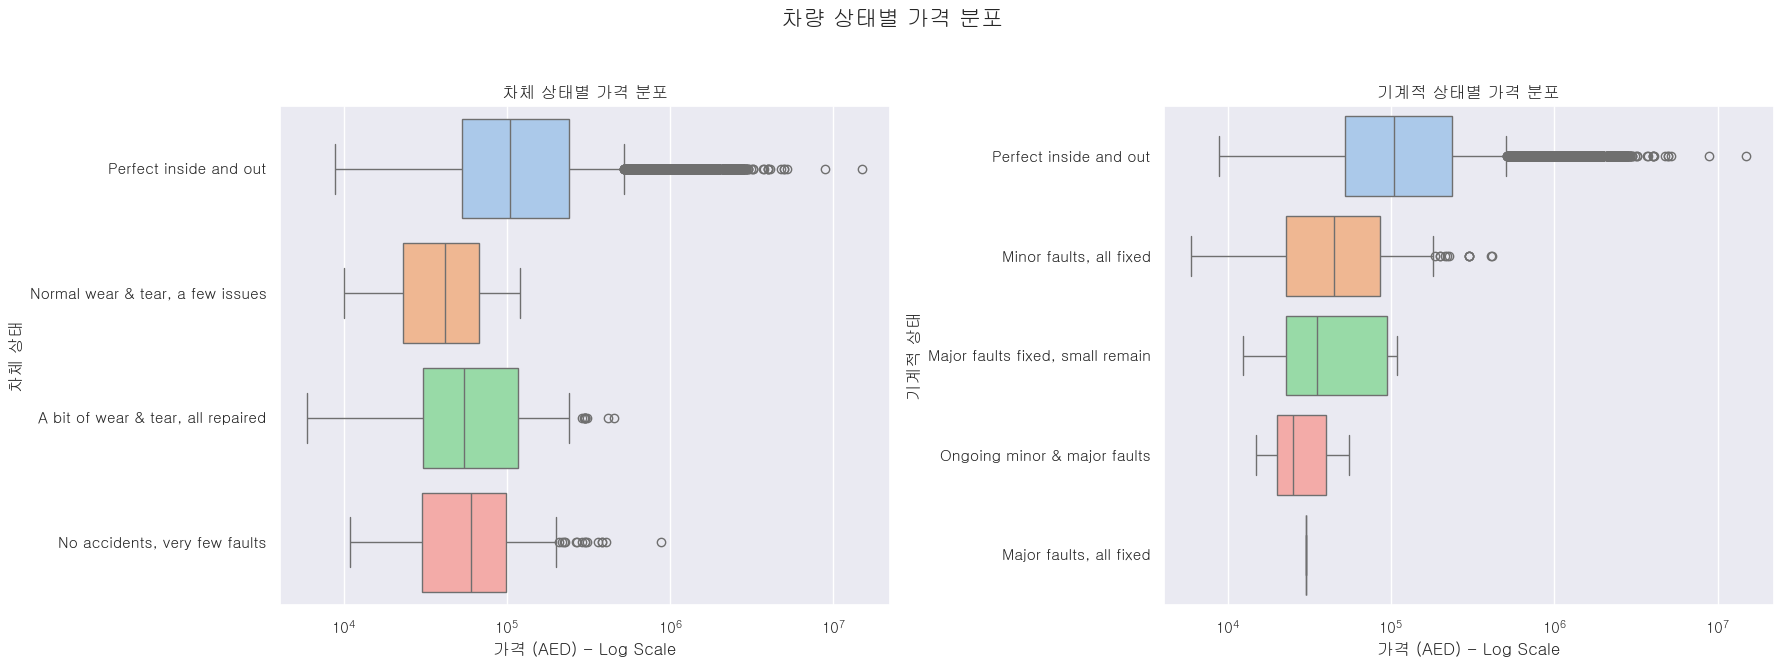

In [16]:
# --- 1. 컬럼의 카테고리 분포 확인 ---
print("--- 'body_condition' 분포 ---")
print(df['body_condition'].value_counts())
print("\n" + "="*40 + "\n")

print("--- 'mechanical_condition' 분포 ---")
print(df['mechanical_condition'].value_counts())
print("\n" + "="*40 + "\n")


# --- 2. 두 변수 간의 관계 확인 ---
print("--- 'body_condition' vs 'mechanical_condition' 교차표 ---")
crosstab_result = pd.crosstab(df['body_condition'], df['mechanical_condition'])
print(crosstab_result)
print("\n" + "="*40 + "\n")


# --- 3. 각 변수와 가격의 관계 시각화 ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('차량 상태별 가격 분포', fontsize=16, fontweight='bold')

# body_condition vs price_in_aed
sns.boxplot(data=df, x='price_in_aed', y='body_condition', ax=axes[0], palette='pastel')
axes[0].set_title('차체 상태별 가격 분포')
axes[0].set_xlabel('가격 (AED) - Log Scale')
axes[0].set_ylabel('차체 상태')
axes[0].set_xscale('log')

# mechanical_condition vs price_in_aed
sns.boxplot(data=df, x='price_in_aed', y='mechanical_condition', ax=axes[1], palette='pastel')
axes[1].set_title('기계적 상태별 가격 분포')
axes[1].set_xlabel('가격 (AED) - Log Scale')
axes[1].set_ylabel('기계적 상태')
axes[1].set_xscale('log')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

두 컬럼 전부 차량의 컨디션의 따라 가격이 증가하는 명백한 순서 관계를 보이는 것을 확인<br>
컨디션에 따라 가중치를 주는 순서형 인코딩을 통해 모델의 성능을 향상을 노려 전처리를 하는 방법을 선택

In [17]:
 # 'title' 컬럼의 결측치(NaN) 개수 확인
title_null_count = df['title'].isnull().sum()
model_null_count = df['model'].isnull().sum()

# 'model' 컬럼에서 'Unknown' 값의 개수 확인 (대소문자 구분 없이)
title_unknown_count = df['title'].str.lower().eq('unknown').sum()
model_unknown_count = df['model'].str.lower().eq('unknown').sum()

print(f"title 컬럼의 결측치(NaN) 개수: {title_null_count}")
print(f"model 컬럼의 결측치(NaN) 개수: {model_null_count}")
print(f"model 컬럼의 'Unknown' 값 개수: {model_unknown_count}")
print(f"title 컬럼의 'Unknown' 값 개수: {title_unknown_count}")

title 컬럼의 결측치(NaN) 개수: 5
model 컬럼의 결측치(NaN) 개수: 0
model 컬럼의 'Unknown' 값 개수: 0
title 컬럼의 'Unknown' 값 개수: 0


--- 'model' 컬럼의 고유(unique) 모델 개수: 552개 ---

--- 가장 빈도가 높은 상위 20개 모델 ---
model
patrol               399
s-class              269
g-class              259
range-rover-sport    208
land-cruiser         200
c-class              192
range-rover          187
e-class              181
pajero               152
charger              140
cayenne              140
7-series             127
grand-cherokee       117
mustang              117
other                115
carrera              114
x5                   110
wrangler             106
f-series-pickup      101
altima               101
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\3609527780.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_20_models.index, x=top_20_models.values, palette='viridis')


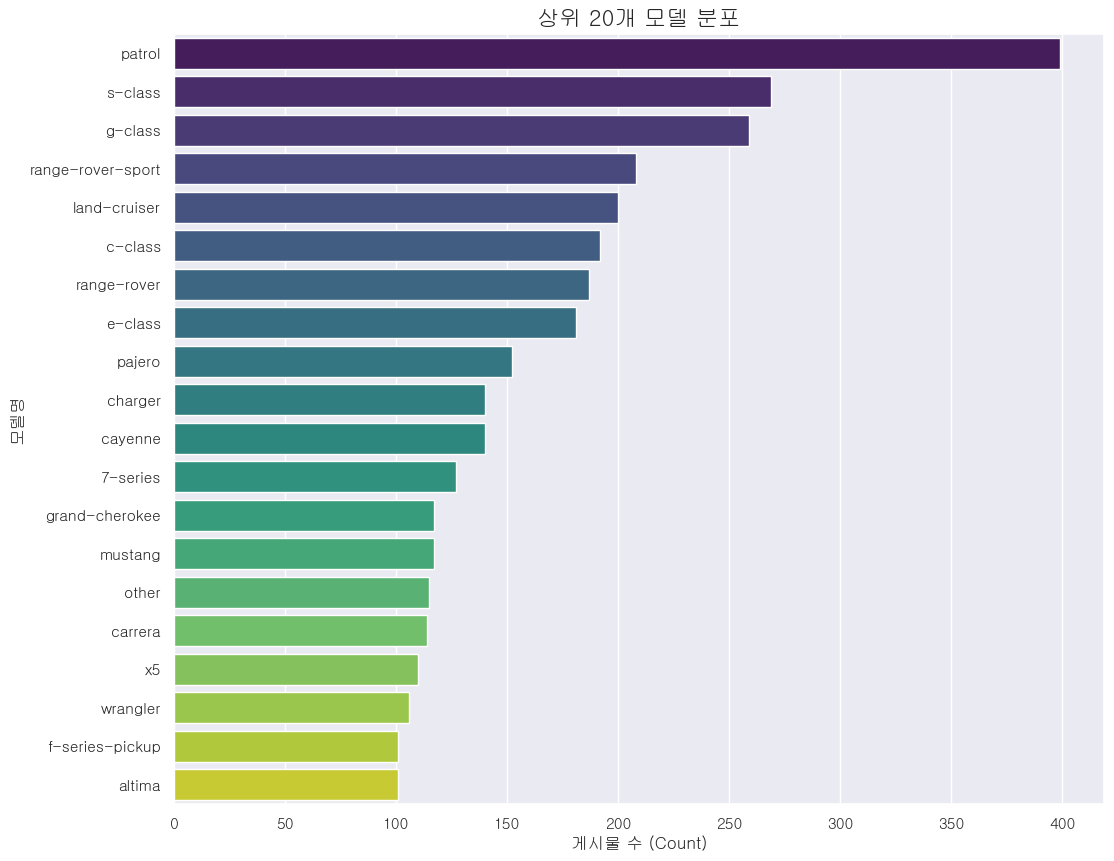

In [18]:
# --- 1. 'model' 컬럼의 고유값 개수 확인 ---
model_cardinality = df['model'].nunique()
print(f"--- 'model' 컬럼의 고유(unique) 모델 개수: {model_cardinality}개 ---")

# --- 2. 가장 빈도가 높은 상위 20개 모델 확인 ---
print("\n--- 가장 빈도가 높은 상위 20개 모델 ---")
top_20_models = df['model'].value_counts().head(20)
print(top_20_models)

# --- 3. 상위 20개 모델 분포 시각화 ---
plt.figure(figsize=(12, 10))
sns.barplot(y=top_20_models.index, x=top_20_models.values, palette='viridis')
plt.title('상위 20개 모델 분포', fontsize=16)
plt.xlabel('게시물 수 (Count)', fontsize=12)
plt.ylabel('모델명', fontsize=12)
plt.show()

--- 'title' 컬럼의 고유(unique) 타이틀 개수: 9169개 ---

--- 'title' 컬럼 내용 샘플 (상위 10개) ---
0                        MITSUBISHI PAJERO 3.5L / 2013
1                                  chevrolet silverado
2    MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...
3    WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...
4                             USED RENAULT DOKKER 2020
5    A7 S-line Quattro. Under Warranty. Accidents F...
6    AED 4,999 /MONTH| JEEP GRAND CHEROKEE SRT V8 6...
7       2022 Mitsubishi L200 2.4L 4x4 AT | EXPORT ONLY
8                    TOYOTA LC PICKUP FULL OPTION 2022
9    Warranty | 0 Down payment | Model 2013 | V6 en...
Name: title, dtype: object


C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\3901190026.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_models.index, x=top_10_models.values, palette='viridis')


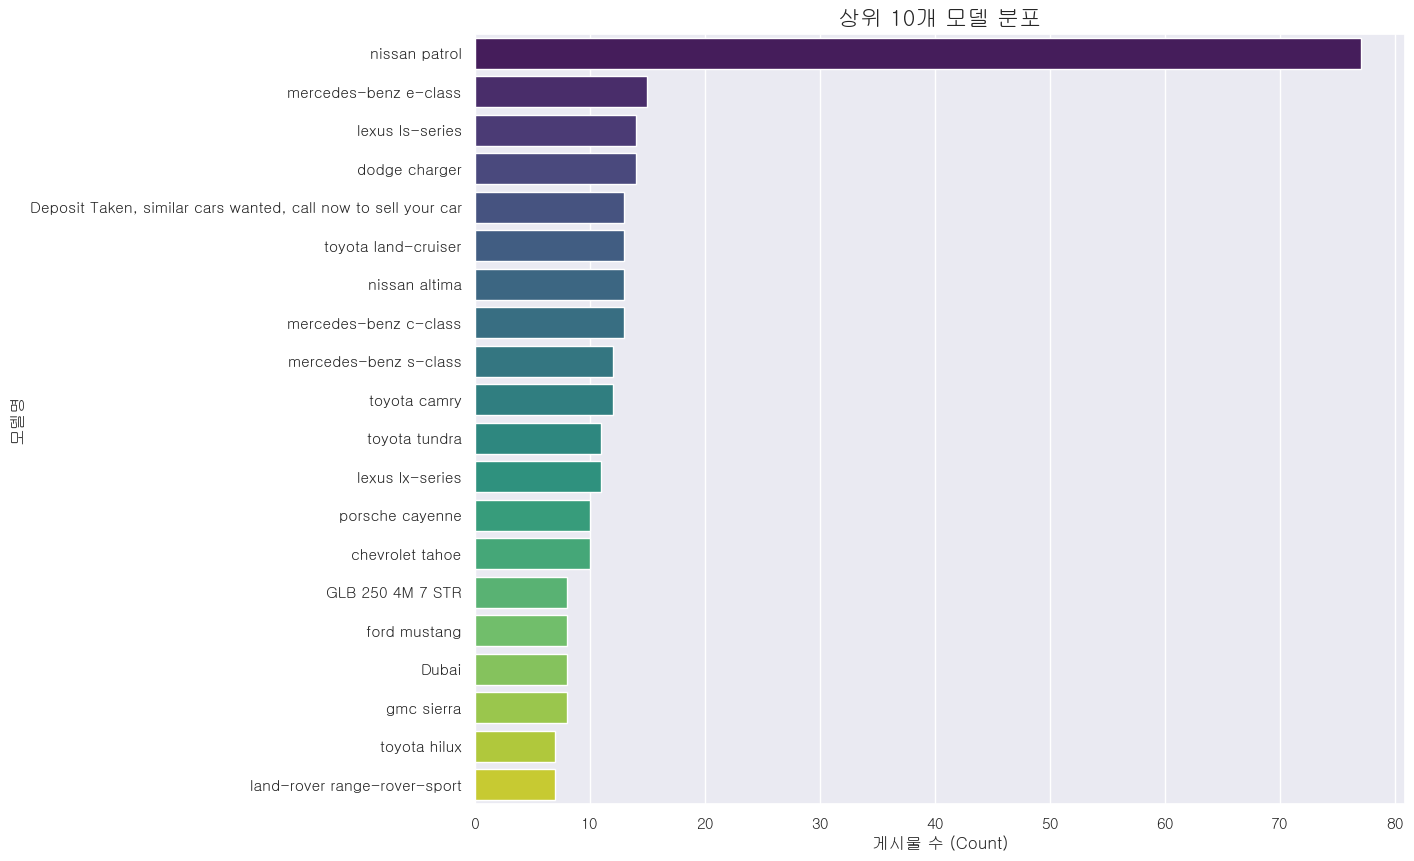

In [19]:
# --- 1. 'title' 컬럼의 고유값 개수 확인 ---
title_cardinality = df['title'].nunique()
print(f"--- 'title' 컬럼의 고유(unique) 타이틀 개수: {title_cardinality}개 ---")

# --- 2. 'title' 내용 샘플 확인 ---
print("\n--- 'title' 컬럼 내용 샘플 (상위 10개) ---")
top_10_models = df['title'].value_counts().head(20)
print(df['title'].head(10))

plt.figure(figsize=(12, 10))
sns.barplot(y=top_10_models.index, x=top_10_models.values, palette='viridis')
plt.title('상위 10개 모델 분포', fontsize=16)
plt.xlabel('게시물 수 (Count)', fontsize=12)
plt.ylabel('모델명', fontsize=12)
plt.show()

EDA를 통해 title 컬럼의 차량의 model 정보와 중복될 뿐만 아니라, '거래 상태'나 '광고 문구' 들이 있어 모델 성능에 악영향을 줄거라 판단,<br> 
따라서 title컬럼은 제거 예정<br>
또한 motors_trim에도 title과 마찬가지로 model에서 많은 중복된 정보가 있을 것이라 판단,<br>
연관성 분석을 실시하기로 판단

In [20]:
# 연관성 분석 (교차표)

# 'motors_trim'과 'model' 컬럼 간의 교차표를 생성합니다.
crosstab_result = pd.crosstab(df['motors_trim'], df['model'])

print("--- 'motors_trim' vs 'model' 교차표  ---")
print(crosstab_result)

--- 'motors_trim' vs 'model' 교차표  ---
model                  1-series  124-spider  156159  2  2-series  2008  \
motors_trim                                                              
1.6 T                         0           0       0  0         0     0   
1.6T I4 4WD                   0           0       0  0         0     0   
1/2 Ultra                     0           0       0  0         0     0   
100D                          0           0       0  0         0     0   
110                           0           0       0  0         0     0   
...                         ...         ...     ... ..       ...   ...   
xDrive35i M Sport             0           0       0  0         0     0   
xDrive40i                     0           0       0  0         0     0   
xDrive50i Exclusive           0           0       0  0         0     0   
xDrive50i Luxury-Line         0           0       0  0         0     0   
xDrive50i M Sport             0           0       0  0         0     0   


EDA 결과 models_trim과 model의 연관성을 교차표로 분석해 결과,<br>
특정트림이 단 하나의 모델에만 종속는 강한 계층관계 확인,<br>
두 변수의 정보가 중복되며 불필요한 차원 증가를 유발하는 것을 확인,<br>
따라서 model_trim 컬럼을 제거하기로 결정

C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\1467021643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='year', order=df['year'].value_counts().index, palette='mako')


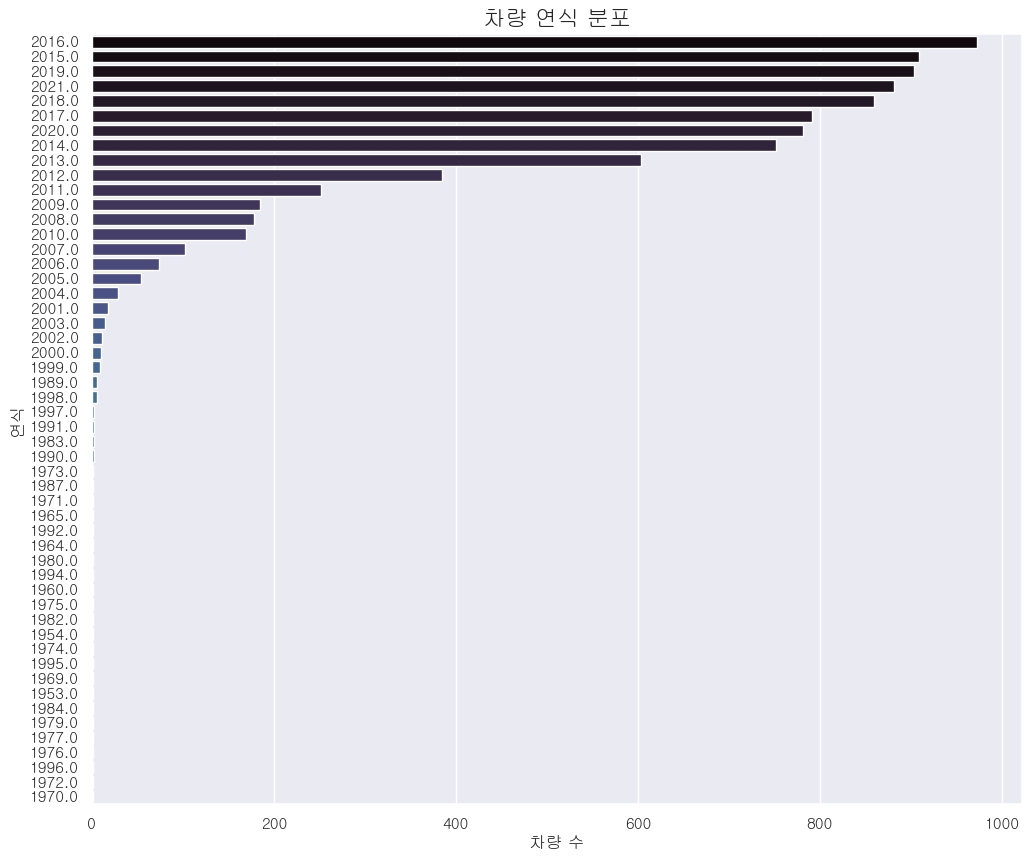

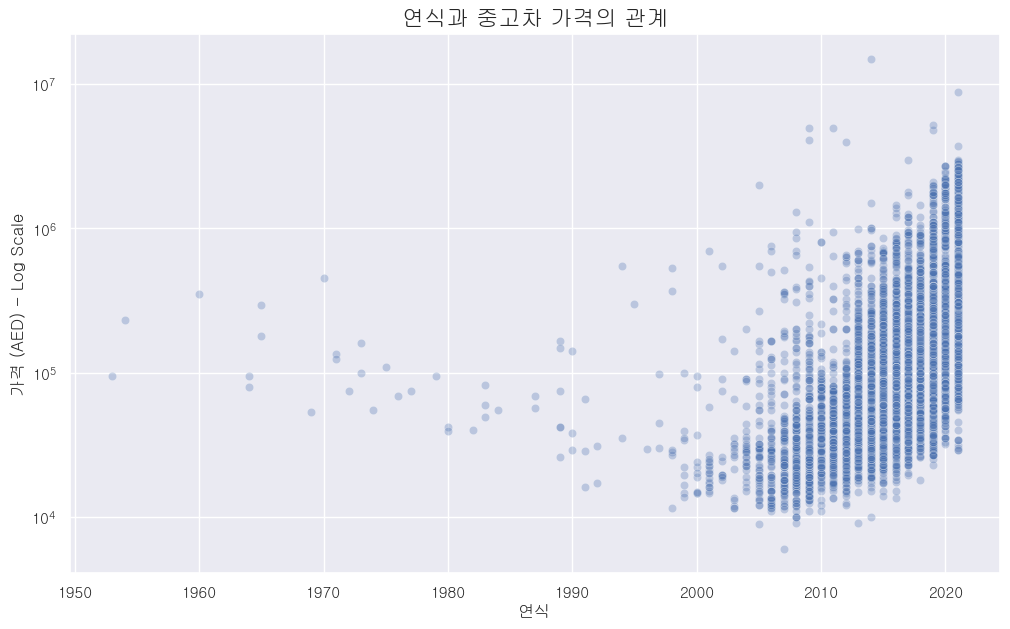

In [21]:
# 1. 연식별 차량 분포 
plt.figure(figsize=(12, 10))
sns.countplot(data=df, y='year', order=df['year'].value_counts().index, palette='mako')
plt.title('차량 연식 분포', fontsize=16)
plt.xlabel('차량 수', fontsize=12)
plt.ylabel('연식', fontsize=12)
plt.show()

# 2. 연식과 가격의 관계
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='year', y='price_in_aed', alpha=0.3)
plt.title('연식과 중고차 가격의 관계', fontsize=16)
plt.xlabel('연식', fontsize=12)
plt.ylabel('가격 (AED) - Log Scale', fontsize=12)
plt.yscale('log')
plt.show()

EDA의 결과 차량 연식은 최신 연도에 집중된 분포를 보이며,<br>
중고차 가격과 양의 상관관계를 가짐<br>
결측치는 중앙값으로 대체하고 모델의 예측력을 높이기 위해 <br>
'차량 나이(age)' 파생 변수를 생성하여 핵심피쳐로  활용할 계획

# EDA 총 결론

타겟 변수인 **price_in_aed**는 오른쪽으로 치우친 분포를 보여 로그 변환 예정<br>
horsepower, year, no_of_cylinder는 가격과 뚜렷한 양의 상관관계,<br> 
kilometers는 음의 상관관계를 보이는 핵심 변수로 확인 <br>
서로 높은 연관성을 보이는 horsepower과 no_of_cylinders의 결측치는 KNN 대체 기법을 사용

company와 model 같은 범주형 변수는 가격 정보 유지를 위해 타겟 인코딩 결정,<br>
seller_type, body_type의 범주형 번수는 분포를 고려하여 'Other'그룹핑 후 원핫 인코딩 적용,M<br>
차량 상태를 나타내는 body_condition과 mechanical_condition은 순서형 특성을 반영해
<br>
순서형 인코딩으로 처리

date_psted에서는 게시 경과일이라는 강력한 파생변수를 생성하였고,<br>
더해 year에서는 차량 나이라는 강력한 파생변수를 생성하였고,<br>
정보가 중복되는 title, motors_trim과 분산이 거의 없는 steering_side를<br>
모델의 안정성을 위해 제거하기로 결정

# 3. 전처리

### 전처리 1. 로그변환

Kilometers컬럼에는 1억km라는 이상치 존재 로그 변환 전 극단적 이상치 처리

In [22]:
# 처리 전 데이터의 행 개수 확인
print(f"이상치 제거 전 데이터 개수: {len(df)}개")

# 주행거리의 상위 0.1% 기준값(quantile)을 찾습니다.
# 이 값보다 큰 데이터는 이상치로 간주합니다.
quantile_999 = df['kilometers'].quantile(0.999)
print(f"주행거리 상위 0.1% 기준값: {quantile_999:,.0f} km")

# 기준값보다 큰 이상치가 몇 개인지 확인
outlier_count = df[df['kilometers'] > quantile_999].shape[0]
print(f"제거될 이상치 데이터 개수: {outlier_count}개")

# 기준값 이하의 데이터만 남겨 이상치를 제거합니다.
df = df[df['kilometers'] <= quantile_999]

# 처리 후 데이터의 행 개수 확인
print(f"이상치 제거 후 데이터 개수: {len(df)}개")

이상치 제거 전 데이터 개수: 9970개
주행거리 상위 0.1% 기준값: 614,071 km
제거될 이상치 데이터 개수: 10개
이상치 제거 후 데이터 개수: 9960개


--- 로그 변환 적용 전/후 데이터 확인 ---
   price_in_aed  price_in_aed_log  kilometers  kilometers_log  days_on_market  \
0         26000         10.165890      167390       12.028088               0   
1        110000         11.608245       39000       10.571343             119   
2         78000         11.264477      200000       12.206078               8   
3        899000         13.709039       27000       10.203629              13   
4         33000         10.404293       69000       11.141876               0   

   days_on_market_log  
0            0.000000  
1            4.787492  
2            2.197225  
3            2.639057  
4            0.000000  

--- 변환 후 분포 시각화 ---


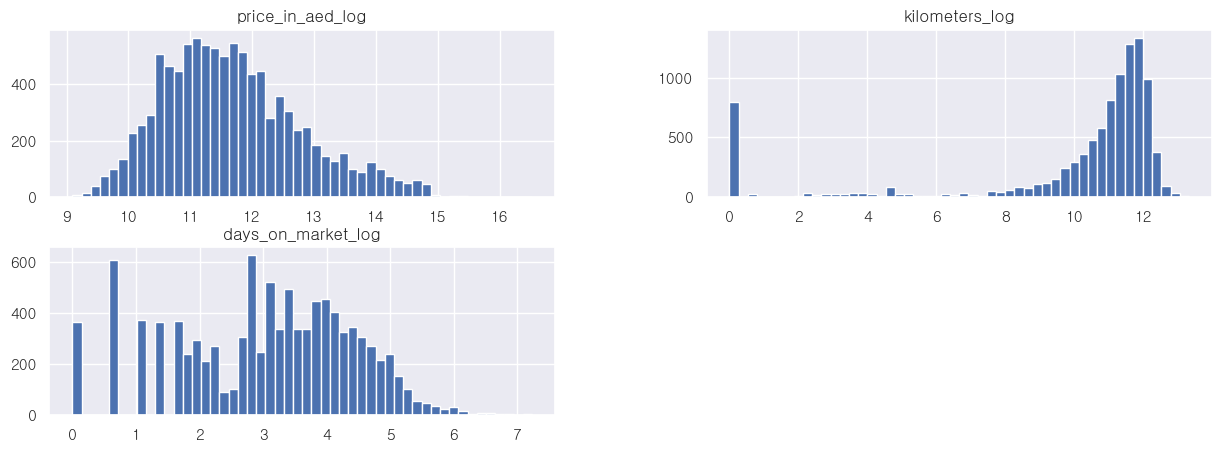

In [23]:
# 로그 변환을 적용할 컬럼 리스트
log_transform_cols = [
    'price_in_aed', 
    'kilometers', 
    'days_on_market'
]

print("--- 로그 변환 적용 전/후 데이터 확인 ---")

for col in log_transform_cols:
    df[f'{col}_log'] = np.log1p(df[col])

display_cols = [item for col in log_transform_cols for item in (col, f'{col}_log')]
print(df[display_cols].head())

# 로그 변환 후 분포를 간단히 시각화
print("\n--- 변환 후 분포 시각화 ---")
df[[f'{col}_log' for col in log_transform_cols]].hist(bins=50, figsize=(15, 5))
plt.show()

### 전처리 2. KNN 최근접 이웃 기법을 이용한 결측치 처리

In [24]:
# 결측치를 채울 컬럼 리스트
imputation_cols = [
    'horsepower_numeric', 
    'no_of_cylinders_numeric'
]

# 1. KNNImputer 객체 생성 (k=5)
imputer = KNNImputer(n_neighbors=5)

# 2. 전체 데이터(df)에 대해 fit_transform 적용
df[imputation_cols] = imputer.fit_transform(df[imputation_cols])

# 3. 결측치가 모두 채워졌는지 확인
print("--- KNN Imputation 후 결측치 개수 확인 ---")
print(df[imputation_cols].isnull().sum())

--- KNN Imputation 후 결측치 개수 확인 ---
horsepower_numeric         0
no_of_cylinders_numeric    0
dtype: int64


### 전처리 3. 타겟 인코딩

In [25]:
# 'company' 컬럼에 대한 타겟 인코딩
company_mean = df.groupby('company')['price_in_aed_log'].mean()
df['company_encoded'] = df['company'].map(company_mean)


# 'model' 컬럼에 대한 타겟 인코딩
model_mean = df.groupby('model')['price_in_aed_log'].mean()
df['model_encoded'] = df['model'].map(model_mean)

# 변환 결과 확인
print("--- 타겟 인코딩 적용 후 데이터 확인 ---")
print(df[['company', 'company_encoded', 'model', 'model_encoded']].head())

--- 타겟 인코딩 적용 후 데이터 확인 ---
         company  company_encoded       model  model_encoded
0     mitsubishi        10.696924      pajero      10.752936
1      chevrolet        11.155518   silverado      11.501063
2  mercedes-benz        12.236484     e-class      11.561960
3        ferrari        13.820787  488-spider      14.070337
4        renault        10.496364      dokker      10.272791


### 전처리 4. 순서형 인코딩

In [26]:
# --- 1. 'body_condition' 순서형 인코딩 ---
# 상태가 좋을수록 높은 점수를 갖도록 매핑(mapping) 딕셔너리를 정의
body_condition_map = {
    'Perfect inside and out': 4,
    'No accidents, very few faults': 3,
    'Normal wear & tear, a few issues': 2,
    'A bit of wear & tear, all repaired': 1
}

# .map() 함수를 이용해 정의된 순서로 인코딩을 적용
df['body_condition_encoded'] = df['body_condition'].map(body_condition_map)


# --- 2. 'mechanical_condition' 순서형 인코딩 ---
# 기계적 상태에 대한 매핑 딕셔너리를 정의
mechanical_condition_map = {
    'Perfect inside and out': 5,
    'Minor faults, all fixed': 4,
    'Major faults fixed, small remain': 3,
    'Major faults, all fixed': 2,
    'Ongoing minor & major faults': 1
}

# 인코딩 적용
df['mechanical_condition_encoded'] = df['mechanical_condition'].map(mechanical_condition_map)


# --- 3. 변환 결과 확인 ---
print("--- 순서형 인코딩 적용 후 데이터 확인 ---")
display_cols = [
    'body_condition', 'body_condition_encoded',
    'mechanical_condition', 'mechanical_condition_encoded'
]
print(df[display_cols].head(10))

# 혹시 매핑되지 않은 값이 있는지 결측치 확인
print("\n--- 인코딩 후 결측치 확인 ---")
print(df[['body_condition_encoded', 'mechanical_condition_encoded']].isnull().sum())

--- 순서형 인코딩 적용 후 데이터 확인 ---
           body_condition  body_condition_encoded    mechanical_condition  \
0  Perfect inside and out                       4  Perfect inside and out   
1  Perfect inside and out                       4  Perfect inside and out   
2  Perfect inside and out                       4  Perfect inside and out   
3  Perfect inside and out                       4  Perfect inside and out   
4  Perfect inside and out                       4  Perfect inside and out   
5  Perfect inside and out                       4  Perfect inside and out   
6  Perfect inside and out                       4  Perfect inside and out   
7  Perfect inside and out                       4  Perfect inside and out   
8  Perfect inside and out                       4  Perfect inside and out   
9  Perfect inside and out                       4  Perfect inside and out   

   mechanical_condition_encoded  
0                             5  
1                             5  
2                     

### 전처리 5. 원-핫 인코딩

In [27]:
# 각 컬럼의 그룹핑 전략에 따라 새로운 컬럼을 생성합니다.

# 1. body_type: 상위 3개 유지, 나머지는 'Other'
top_3_body = df['body_type'].value_counts().nlargest(3).index
df['body_type_grouped'] = df['body_type'].where(df['body_type'].isin(top_3_body), 'Other')

# 2. transmission_type, regional_specs, fuel_type: 최빈값 유지, 나머지는 'Other'
binary_cols = ['transmission_type', 'regional_specs', 'fuel_type']
for col in binary_cols:
    mode_val = df[col].mode()[0]
    df[f'{col}_grouped'] = df[col].where(df[col] == mode_val, 'Other')

# 3. color, emirate: 상위 3개 유지, 나머지는 'Other'
top_3_cols = ['color', 'emirate']
for col in top_3_cols:
    top_3_val = df[col].value_counts().nlargest(3).index
    df[f'{col}_grouped'] = df[col].where(df[col].isin(top_3_val), 'Other')

# --- 원-핫 인코딩 단계 ---

# 인코딩을 적용할 최종 컬럼 리스트
# seller_type은 그룹핑 없이 바로 적용
one_hot_cols = [
    'body_type_grouped',
    'seller_type',
    'transmission_type_grouped',
    'regional_specs_grouped',
    'fuel_type_grouped',
    'color_grouped',
    'emirate_grouped'
]

# pd.get_dummies를 사용하여 원-핫 인코딩 적용
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# 생성된 더미 변수 확인
print("--- 원-핫 인코딩으로 생성된 컬럼 확인 ---")
encoded_col_names = [col for col in df_encoded.columns if '_grouped_' in col or '_type_' in col or '_specs_' in col or '_emirate_' in col]
print(encoded_col_names)

# 변환 결과 확인 (상위 5개)
print("\n--- 인코딩 적용 후 데이터 샘플 확인 ---")
print(df_encoded[encoded_col_names].head())

--- 원-핫 인코딩으로 생성된 컬럼 확인 ---
['body_type_grouped_Other', 'body_type_grouped_SUV', 'body_type_grouped_Sedan', 'seller_type_Dealership/Certified Pre-Owned', 'seller_type_Owner', 'transmission_type_grouped_Other', 'regional_specs_grouped_Other', 'fuel_type_grouped_Other', 'color_grouped_Grey', 'color_grouped_Other', 'color_grouped_White', 'emirate_grouped_ Dubai', 'emirate_grouped_ Sharjah', 'emirate_grouped_Other']

--- 인코딩 적용 후 데이터 샘플 확인 ---
   body_type_grouped_Other  body_type_grouped_SUV  body_type_grouped_Sedan  \
0                    False                   True                    False   
1                    False                   True                    False   
2                    False                  False                     True   
3                     True                  False                    False   
4                     True                  False                    False   

   seller_type_Dealership/Certified Pre-Owned  seller_type_Owner  \
0                  

In [28]:
import numpy as np

print("--- 'title' 컬럼에서 새로운 피처 생성 ---")

# 추출할 키워드 리스트
keywords = {
    'has_warranty': 'warranty',
    'is_gcc': 'gcc',
    'has_accident': 'accident',
    'is_full_option': 'full' # 'full option'을 포함하기 위해 'full' 사용
}

# 각 키워드에 대해 새로운 피처 컬럼 생성
for new_col, keyword in keywords.items():
    # .str.contains()를 사용해 키워드 포함 여부를 True/False로 찾고, 
    # .astype(int)로 1/0으로 변환합니다.
    # case=False는 대소문자 구분 없이, na=False는 결측치를 0으로 처리합니다.
    df[new_col] = df['title'].str.contains(keyword, case=False, na=False).astype(int)

# 생성된 피처들과 원본 title을 함께 확인
new_feature_cols = list(keywords.keys())
print("\n--- 생성된 피처 확인 (상위 10개) ---")
print(df[['title'] + new_feature_cols].head(10))

# 각 피처가 몇 개의 데이터에 해당하는지 확인
print("\n--- 각 피처별 1의 개수 (True인 경우) ---")
print(df[new_feature_cols].sum())

--- 'title' 컬럼에서 새로운 피처 생성 ---

--- 생성된 피처 확인 (상위 10개) ---
                                               title  has_warranty  is_gcc  \
0                      MITSUBISHI PAJERO 3.5L / 2013             0       0   
1                                chevrolet silverado             0       0   
2  MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...             0       1   
3  WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...             1       0   
4                           USED RENAULT DOKKER 2020             0       0   
5  A7 S-line Quattro. Under Warranty. Accidents F...             1       0   
6  AED 4,999 /MONTH| JEEP GRAND CHEROKEE SRT V8 6...             0       1   
7     2022 Mitsubishi L200 2.4L 4x4 AT | EXPORT ONLY             0       0   
8                  TOYOTA LC PICKUP FULL OPTION 2022             0       0   
9  Warranty | 0 Down payment | Model 2013 | V6 en...             1       0   

   has_accident  is_full_option  
0             0               0  
1             

### 전처리 6. 컬럼 제거

In [29]:
# 제거할 컬럼 리스트 정의
cols_to_drop = ['title', 'motors_trim', 'steering_side']

# 데이터프레임에서 해당 컬럼들을 제거합니다.
final_df = df_encoded.drop(cols_to_drop, axis=1)

print("--- 컬럼 제거 후 남은 피처 목록 ---")
print(final_df.columns.tolist())

print(f"\n최종 데이터셋 크기: {final_df.shape}")

--- 컬럼 제거 후 남은 피처 목록 ---
['price_in_aed', 'kilometers', 'body_condition', 'mechanical_condition', 'body_type', 'no_of_cylinders', 'transmission_type', 'regional_specs', 'horsepower', 'fuel_type', 'year', 'color', 'emirate', 'company', 'model', 'date_posted', 'horsepower_numeric', 'no_of_cylinders_numeric', 'days_on_market', 'post_month', 'price_in_aed_log', 'kilometers_log', 'days_on_market_log', 'company_encoded', 'model_encoded', 'body_condition_encoded', 'mechanical_condition_encoded', 'body_type_grouped_Other', 'body_type_grouped_SUV', 'body_type_grouped_Sedan', 'seller_type_Dealership/Certified Pre-Owned', 'seller_type_Owner', 'transmission_type_grouped_Other', 'regional_specs_grouped_Other', 'fuel_type_grouped_Other', 'color_grouped_Grey', 'color_grouped_Other', 'color_grouped_White', 'emirate_grouped_ Dubai', 'emirate_grouped_ Sharjah', 'emirate_grouped_Other']

최종 데이터셋 크기: (9960, 41)


### 전처리 7. 피처 스케일링

피처 스케일링 전 year열에서 파생변수 age를 생성, date_posted의 파생변수 days_on_market은 이미 EDA과정 중 생성

In [30]:
# 1. 'age' 컬럼 생성
# 데이터셋의 최신 연도를 기준으로 '나이' 피처 생성
latest_year = df['year'].max()
df['age'] = latest_year - df['year']

# 2. 'age' 컬럼의 결측치를 중앙값으로 대체
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

# 3. 결과 확인
print("--- 'age' 피처 생성 및 결측치 처리 후 데이터 확인 ---")
print(df[['year', 'age']].head())
print(f"\n'age' 컬럼의 결측치 개수: {df['age'].isnull().sum()}개")

--- 'age' 피처 생성 및 결측치 처리 후 데이터 확인 ---
     year  age
0  2013.0  8.0
1  2018.0  3.0
2  2014.0  7.0
3  2018.0  3.0
4  2020.0  1.0

'age' 컬럼의 결측치 개수: 0개


C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\772242931.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


In [31]:
# --- 1. 최종 피처 선택 ---
# 원본 컬럼 및 불필요한 컬럼 리스트
original_cols_to_drop = [
    'price_in_aed', 'kilometers', 'body_condition', 'mechanical_condition',
    'body_type', 'no_of_cylinders', 'transmission_type', 'regional_specs',
    'horsepower', 'fuel_type', 'year', 'color', 'emirate', 'company', 'model',
    'date_posted', 'horsepower_numeric', 'no_of_cylinders_numeric',
    'days_on_market', 'post_month', 'kilometers_log', 'days_on_market_log', 'age'
]

X = final_df.drop(original_cols_to_drop + ['price_in_aed_log'], axis=1)
y = final_df['price_in_aed_log']


# --- 2. 데이터 분리 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 3. 피처 스케일링 ---
# 스케일링이 필요한 컬럼들을 선택 (원-핫 인코딩된 컬럼은 제외).
cols_to_scale = [
    'company_encoded',
    'model_encoded',
    'body_condition_encoded',
    'mechanical_condition_encoded'
]

# StandardScaler 객체 생성
scaler = StandardScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# --- 4. 최종 데이터 확인 ---
print("--- 모든 전처리 및 스케일링이 완료된 최종 학습 데이터 (상위 5개) ---")
print(X_train.head())

print("\n--- 학습 데이터 크기 ---")
print(X_train.shape)

KeyError: "['age'] not found in axis"

# 4. 모델 학습

### Ridge 모델

In [ ]:
# --- 1. 릿지 회귀 모델 생성 및 학습 ---
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


# --- 2. 모델 성능 평가 (RMSE) ---
y_pred_log = ridge_model.predict(X_test)

y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

print("--- 릿지 회귀 모델 성능 평가 ---")
print(f"RMSE : {rmse:,.2f} AED")
print(f"R² Score : {r2:,.2f}")

--- 릿지 회귀 모델 성능 평가 ---
RMSE : 218,541.01 AED
R² Score : 0.72


In [ ]:
# --- 1. 릿지 회귀 모델 생성 ---
ridge_model_cv = Ridge(alpha=1.0)

# --- 2. 5-겹 교차 검증 수행 ---
scoring_metrics = ['r2', 'neg_mean_squared_error']

cv_results = cross_validate(ridge_model_cv, X_train, y_train, 
                            cv=5, scoring=scoring_metrics)


# --- 3. 교차 검증 결과 처리 및 출력 ---
# R² 점수 
r2_scores = cv_results['test_r2']

# MSE 점수를 RMSE로 변환
neg_mse_scores = cv_results['test_neg_mean_squared_error']
rmse_scores = np.sqrt(-neg_mse_scores)

print("--- 릿지 회귀 5-겹 교차 검증 성능 평가 ---")
print(f"평균 R² 점수: {r2_scores.mean():.2f} (표준편차: {r2_scores.std():.2f})")
print(f"평균 RMSE 점수: {rmse_scores.mean():,.2f} (표준편차: {rmse_scores.std():,.2f})")

--- 릿지 회귀 5-겹 교차 검증 성능 평가 ---
평균 R² 점수: 0.73 (표준편차: 0.02)
평균 RMSE 점수: 0.59 (표준편차: 0.01)


릿지 모델을 5-fold 교차검증을 실시한 결과,<BR>
평균계수(R²)는 약 0.73으로 준수하고 안정적인 성능을 보임,<BR>
평균 RMSE는 약 0.59이며 표준편차는 0.01로 매우 낮아 신뢰도가 높은 모델임을 시사함.<BR>

### 랜덤 포레스트 모델

In [ ]:
# --- 1. 랜덤 포레스트 모델 생성 및 학습 ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)


# --- 2. 모델 성능 평가 (RMSE & R²) ---
y_pred_log_rf = rf_model.predict(X_test)

y_test_original = np.expm1(y_test)
y_pred_original_rf = np.expm1(y_pred_log_rf)

# RMSE와 R² 계산
rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_original_rf))
r2_rf = r2_score(y_test_original, y_pred_original_rf)

print("--- 랜덤 포레스트 모델 성능 평가 ---")
print(f"RMSE : {rmse_rf:,.2f} AED")
print(f"R² Score : {r2_rf:.2f}")

--- 랜덤 포레스트 모델 성능 평가 ---
RMSE : 202,817.37 AED
R² Score : 0.76


In [ ]:
# --- 1. 랜덤 포레스트 모델 생성 ---
rf_model_cv = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# --- 2. 5-겹 교차 검증 수행 ---
# 평가 지표 리스트
scoring_metrics = ['r2', 'neg_mean_squared_error']

# cross_validate 함수로 교차 검증 실행
cv_results_rf = cross_validate(rf_model_cv, X_train, y_train, 
                               cv=5, scoring=scoring_metrics)

# --- 3. 교차 검증 결과 처리 및 출력 ---
# R² 점수
r2_scores_rf = cv_results_rf['test_r2']

# MSE 점수를 RMSE로 변환
neg_mse_scores_rf = cv_results_rf['test_neg_mean_squared_error']
rmse_scores_rf = np.sqrt(-neg_mse_scores_rf)

print("--- 랜덤 포레스트 5-겹 교차 검증 성능 평가 ---")
print(f"평균 R² 점수: {r2_scores_rf.mean():.2f} (표준편차: {r2_scores_rf.std():.2f})")
print(f"평균 RMSE 점수: {rmse_scores_rf.mean():,.2f} (표준편차: {rmse_scores_rf.std():,.2f})")

--- 랜덤 포레스트 5-겹 교차 검증 성능 평가 ---
평균 R² 점수: 0.72 (표준편차: 0.02)
평균 RMSE 점수: 0.60 (표준편차: 0.02)


랜덤포레스트 모델을 5-fold 교차검증을 실시한 결과,<BR>
평균계수(R²)는 약 0.72으로 준수하고 안정적인 성능을 보임,<BR>
평균 RMSE는 약 0.60이며 표준편차는 0.02로 낮아 신뢰도가 높은 모델임을 시사함.<BR>

### XGBoost 모델

In [ ]:
# --- 1. XGBoost 모델 생성 및 학습 ---
xgb_model = xgb.XGBRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

xgb_model.fit(X_train, y_train, 
              eval_set=[(X_test, y_test)], 
              early_stopping_rounds=10, 
              verbose=False)


# --- 2. 모델 성능 평가 (RMSE & R²) ---
y_pred_log_xgb = xgb_model.predict(X_test)

y_test_original = np.expm1(y_test)
y_pred_original_xgb = np.expm1(y_pred_log_xgb)

# RMSE와 R² 계산
rmse_xgb = np.sqrt(mean_squared_error(y_test_original, y_pred_original_xgb))
r2_xgb = r2_score(y_test_original, y_pred_original_xgb)

print("--- XGBoost 모델 성능 평가 ---")
print(f"RMSE : {rmse_xgb:,.2f} AED")
print(f"R² Score : {r2_xgb:.2f}")

--- XGBoost 모델 성능 평가 ---
RMSE : 197,730.22 AED
R² Score : 0.77


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:
# --- 1. XGBoost 모델 생성 ---
xgb_model_cv = xgb.XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1)

# --- 2. 5-겹 교차 검증 수행 ---
scoring_metrics = ['r2', 'neg_mean_squared_error']

cv_results_xgb = cross_validate(xgb_model_cv, X_train, y_train, 
                                cv=5, scoring=scoring_metrics)

# --- 3. 교차 검증 결과 처리 및 출력 ---
# R² 점수
r2_scores_xgb = cv_results_xgb['test_r2']

# MSE 점수를 RMSE로 변환
neg_mse_scores_xgb = cv_results_xgb['test_neg_mean_squared_error']
rmse_scores_xgb = np.sqrt(-neg_mse_scores_xgb)

print("--- XGBoost 5-겹 교차 검증 성능 평가 ---")
print(f"평균 R² 점수: {r2_scores_xgb.mean():.2f} (표준편차: {r2_scores_xgb.std():.2f})")
print(f"평균 RMSE 점수: {rmse_scores_xgb.mean():,.2f} (표준편차: {rmse_scores_xgb.std():.2f})")

--- XGBoost 5-겹 교차 검증 성능 평가 ---
평균 R² 점수: 0.72 (표준편차: 0.02)
평균 RMSE 점수: 0.60 (표준편차: 0.02)


XGBoost 모델을 5-fold 교차검증을 실시한 결과,<BR>
평균계수(R²)는 약 0.72으로 준수하고 안정적인 성능을 보임,<BR>
평균 RMSE는 약 0.60이며 표준편차는 0.02로 낮아 신뢰도가 높은 모델임을 시사함.<BR>

# 5. 하이퍼파라미터 튜닝

In [ ]:
models_and_params = {
    'Ridge': {
        'model': Ridge(random_state=42),
        'params': {
            'alpha': uniform(0.1, 10)
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': randint(100, 500),      
            'max_depth': randint(10, 50),           
            'min_samples_split': randint(2, 20),    
            'min_samples_leaf': randint(1, 20)      
        }
    },
    'XGBoost': {
        'model': xgb.XGBRegressor(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': randint(100, 500),
            'learning_rate': uniform(0.01, 0.3),   
            'max_depth': randint(3, 10),
            'subsample': uniform(0.7, 0.3),         
            'colsample_bytree': uniform(0.7, 0.3)  
        }
    }
}

# 각 모델에 대해 RandomizedSearchCV를 실행하고 결과 출력
for model_name, mp in models_and_params.items():
    print(f"========== {model_name} 하이퍼파라미터 튜닝 시작 ==========")
    
    random_search = RandomizedSearchCV(
        estimator=mp['model'],
        param_distributions=mp['params'],
        n_iter=50, 
        cv=5,
        scoring='neg_mean_squared_error',
        random_state=42,
        n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_estimator_
    y_pred_log = best_model.predict(X_test)
    
    y_test_original = np.expm1(y_test)
    y_pred_original = np.expm1(y_pred_log)
    
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
    r2 = r2_score(y_test_original, y_pred_original)
    
    # 결과 출력
    print(f"최적의 파라미터: {random_search.best_params_}")
    print(f"튜닝 후 테스트 데이터 RMSE: {rmse:,.2f} AED")
    print(f"튜닝 후 테스트 데이터 R² Score: {r2:.2f}")
    print(f"==================================================\n")

========== Ridge 하이퍼파라미터 튜닝 시작 ==========
최적의 파라미터: {'alpha': np.float64(7.180725777960454)}
튜닝 후 테스트 데이터 RMSE: 218,533.26 AED
튜닝 후 테스트 데이터 R² Score: 0.72

========== RandomForest 하이퍼파라미터 튜닝 시작 ==========
최적의 파라미터: {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 323}
튜닝 후 테스트 데이터 RMSE: 196,971.37 AED
튜닝 후 테스트 데이터 R² Score: 0.77

========== XGBoost 하이퍼파라미터 튜닝 시작 ==========
최적의 파라미터: {'colsample_bytree': np.float64(0.8199582915145766), 'learning_rate': np.float64(0.023999698964084628), 'max_depth': 6, 'n_estimators': 370, 'subsample': np.float64(0.8368209952651107)}
튜닝 후 테스트 데이터 RMSE: 200,164.18 AED
튜닝 후 테스트 데이터 R² Score: 0.77

